In [1]:
from jupyterthemes import jtplot
# onedork | grade3 | oceans16 | chesterish | monokai | solarizedl | solarizedd
jtplot.style(theme='oceans16')

# Numpy 소개
3장과 함께 이번 장에서는 파이썬에서 인메모리 데이터를 효과적으로 적재하고 저장하고 가공하는 기법을 설명하겠다. 이 주제는 매우 광범위하다. 데이터세트는 광범위한 원천으로부터 문서나 이미지, 사운드 클립, 수치 측정값 등 거의 모든 것을 아우르는 매우 다양한 형식으로 들어올 수 있다. 이렇게 명백한 다양성에도 불구하고 모든 데이터를 근본적으로 숫자 배열로 간주하는 것이 도움이 될 것이다.
<br><br>
예를 들어, 이미지(특히, 디지털 이미지)는 단순히 해당 영역에 대한 픽셀 밝기를 나타내는 2차원 숫자 배열로 생각할 수 있다. 사운드 클립은 시간 대비 강도(intensity)를 나타내는 일차원 배열로 생각할 수 있다. 텍스트는 특정 단어나 단어 쌍의 빈도를 나타내는 이진수처럼 다양한 방식을 통해 수치로 전환할 수 있다. 데이터가 무엇이든 상관없이 그 데이터를 분석할 수 있게 만드는 첫 번째 단계는 데이터를 숫자 배열로 변환하는 것이다. (이 절차에 대한 몇 가지 예제를 429쪽 '특징 공학'에서 살펴본다.)
<br><br>
이러한 이유로 숫자 배열을 효과적으로 저장하고 가공하는 것은 데이터 과학을 수행하는 절차에서 가장 근본적인 작업이다. 잊 ㅔ파이썬이 이러한 숫자 배열을 다루기 위해 제공하는 전문 도구인 NumPy 패키지와 Pandas 패키지(3장)를 살펴보겠다.
<br><br>
이번 장에서는 NumPy에 대해 자세히 다룬다. NumPy(Numerical Python의 약자)는 조밀한 데이터 버퍼에서 저장하고 처리하는 효과적인 인터페이스를 제공한다. 어떤 면에서 보면 NumPy 배열은 파이썬 내장 타입인 list와 비슷하지만 배열의 규모가 커질수록 데이터 저장 및 처리에 훨씬 더 효율적이다. NumPy 배열은 파이썬의 데이터 과학 도구로 구성된 전체 생태계의 핵심을 이루고 있기 때문에 관심 있는 데이터 과학 측면이 무엇이든 상관없이 NumPy를 효과적으로 사용하는 법을 배워야 한다.
<br><br>
서문에서 권고했던 내용에 따라 아나콘다 스택을 설치했다면 이미 NumPy가 설치돼 있을 것이다. 뭐든 직접 해 보기를 좋아하는 독자라면 NumPy 웹사이트에 가서 설치 안내에 따라 설치하면 된다. 설치하고 나면 NumPy를 임포트하고 버전을 재확인할 수 있다.

In [2]:
import numpy
numpy.__version__

'1.15.1'

이 책에서는 NumPy 버전 1.8 이상을 추천한다. 관례상 SciPy와 PyData를 사용하는 대부분의 사용자는 NumPy를 별칭(alias)인 np를 사용해 임포트한다.

In [3]:
import numpy as np

이번 장을 비롯한 이 책의 나머지 부분에서도 이처럼 NumPy를 임포트하고 사용하는 것을 보게 될 것이다.

### 내장  문서가 있음을 기억하자!
이번 장을 읽을 때 IPython에서는 탭 자동 완성 기능을 사용해 패키지의 내용을 빠르게 탐색할 수 있고 ? 기호를 사용해 다양한 함수의 문서를 확인할 수 있다는 사실을 잊지 말자. 이 기능이 잘 기억나지 않는다면 3쪽'IPython의 도움말과 문서'를 참고하라

예를 들어, numpy 네임스페이스의 모든 내용을 표시하고 싶담녀 다음과 같이 입력하면 된다.
 np.<tab>
NumPy의 내장 문서를 표시하려면 다음 명령어를 사용하면 된다.
 np?
튜토리얼과 다른 참고자료와 함께 더 자세한 문서는 넘파이 홈페이지 에서 확인할 수 있다.

## 파이썬의 데이터 타입 이해하기
효과적인 데이터 기반 과학 및 계산을 위해서는 데이터가 어떻게 저장되고 가공되는지 이해해야 한다. 이번 절에서는 데이터 배열이 파이썬 언어 자체에서 어떻게 처리되는지 간단히 설명하고 비교한 뒤, NumPy가 이를 어떻게 개선하는지 알아볼 것이다. 이 차이점을 이해하는 것은 책 나머지에 등장하는 많은 자료를 이해하는데 기초가 될 것이다.
<br><br>
파이썬 사용자는 대채로 파이썬의 사용 편의성에 끌리는데 그중 하나가 동적 타이핑이다. C나 자바 같은 정적 타입 체계를 가진 언어는 모든 변수를 명시적으로 선언해야 하지만, 파이썬처럼 동적 타입 체계를 가진 언어는 타입을 지정하지 않아도 된다. 예를 들어, C에서는 특정 연산을 다음과 같이 지정할 것이다.

In [4]:
# int result=0;
# for(int i=0; i< 100; i++){
#     result += i;
# }

In [5]:
result = 0
for i in range(100):
    result += i

주요 차이점을 알겠는가? C에서는 각 변수의 데이터 타입을 명시적으로 선언했지만, 파이썬은 타입을 동적으로 추론한다. 이것은 곧 모든 변수에 어떤 종류의 데이터든 할당할 수 있다는 뜻이다.

In [6]:
x = 4
x = "four"

위 코드는 x의 내용을 정수에서 문자열로 바꾼 것이다. C에서 똑같이 작업을 하면 컴파일러 에러나 다른 의도하지 않은 결과가 발생할 수도 있다. 이러한 유연성은 파이썬과 다른 동적 타입 지정 언어를 사용하기 편하고 쉽게 만드는 특징 중 하나다. 이것이 어떻게 가능한지를 이해하는 것이 파이썬으로 효과적으로 효율적으로 데이터를 분석하는 법을 배우는데 중요한 부분이다. 그러나 이러한 유연성은 또한 파이썬 변수가 그 값 이상의 무언가를 나타낸다는 뜻이기도 하다. 즉, 변수는 그 값의 유형에 대한 부가 정보도 함께 담고 있다. 다음 절에서 이에 대해 더 자세히 살펴보자.

#### 파이썬 정수는 정수 이상이다
표준 파이썬은 C로 구현돼 있다. 이 말은 곧 모든 파이썬 객체가 그 값뿐만 아니라 다른 정보까지 포함하는 똑똑하게 위장한 C 구조체라는 뜻이다. 예를 들어, x = 10000과 같이 파이썬에서 정수를 정의할 때 x는 단순히 있는 그대로의 정수를 의미하지 않는다. 실제로는 여러 값이 들어 있는 복합적인 C 구조체다. C 매크로를 확장하여 파이썬 3.6 소스코드를 보면 정수(long)타입 정의가 실제로 다음과 같이 돼있다.

    struct _longobject{
        long ob_refcnt;
        PyTypeObject *ob_type;
        size_t ob_size;
        long ob_digit[1];
    };

파이썬 3.6의 단일 정수는 실제로 다음 네 가지 구성요소를 갖는다.

- ob_refcnt: 파이썬이 조용히 메모리 할당과 해제를 처리할 수 있게 돕는 참조 횟수
- ob_type: 변수 타입을 인코딩
- ob_size: 다음 데이터 멤버의 크기를 지정
- ob_digit: 파이썬 변수가 나타내는 실제 정숫값을 포함
![그림 2-1](figures/cint_vs_pyint.png)

이것은 그림 2-1처럼 C와 같은 컴파일 언어에서 정수를 저장하는 것에 비해 파이썬에서 정수를 저장할때 어느정도 오버헤드가 있다는 의미다.
여기서 PyObject_Head는 참조 횟수, 타입 코드, 그리고 전에 언급한 다른 정보를 포함한 구조체의 일부다.
<br><br>
차이점이라면 C 정수는 근본적으로 정숫값을 나타내는 바이트를 포함하는 메모리 위치를  가리키는 레이블이고 파이썬 정수는 정숫값을 담고 있는 바이트를 포함한 모든 파이썬 객체 정보를 포함하는 메모리의 위치를 가리키는 포인터라는 사실이다. 파이썬 정수 구조체의 이 추가 정보 덕분에 파이썬에서 그토록 자유롭게 동적을 코드를 작성할 수 있는 것이다. 하지만 파이썬 타입에 있는 모든 추가 정보에는 비용이 따르며, 특히 이 객체들을 여러 개 결합하는 구조에서 그 비용이 분명하게 드러난다.


#### 파이썬 리스트는 리스트 이상이다
이번에는 여러 개의 파이썬 객체를 담은 파이썬 자료 구조를 사용할 때 어떤 일이 벌어지는지 생각해 보자. 파이썬에서 여러 개의 요소를 담는 가변적인 표준 컨테이너는 리스트다. 다음과 같이 정수 리스트를 만들 수 있다.

In [7]:
L = list(range(10))
L

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [8]:
type(L[0])

int

In [9]:
L2 = [str(c) for c in L]
L2

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

In [10]:
type(L2[0])

str

파이썬의 동적 타이핑(dynamic typing) 덕분에 서로 다른 데이터 타입의 요소를 담는 리스트를 만들 수도 있다.

In [11]:
L3 = [True, "2", 3.0, 4]
[type(item) for item in L3]

[bool, str, float, int]

그러나 이 유연성에는 비용이 따른다. 이렇게 유연한 타입을 허용하려면 리스트의 각 항목에 타입 정보와 참조 횟수, 기타 정보가 들어가야 한다. 즉, 각 항목이 완전한 파이썬 객체인 셈이다. 모든 변수가 같은 타입인 경우에는 이 정보가 대부분 불필요하게 중복되므로 고정 타입 배열에 데이터를 저장하는 것이 더 효율적일 수 있다. 동적 타입 리스트와 고정 타입(NumPy 스타일) 배열의 차이는 그림 2-2에 그림 으로 나타냈다.
<br><br>
구현 레벨에서는 배열이 근본적으로 인접한 데이터 블록을 가리키는 단일 포인터를 담고 있다. 반면 파이썬 리스트는 앞에서 본 파이썬 정수와 같이 완전한 파이썬 객체를 차례로 가리키는 포인터의 블록을 가리키는 포인터를 담고 있다. 다시 말하지만, 리스트의 장점은 유연성이다. 각 리스트 요소가 데이터와 타입 정보를 포함하는 완전한 구조이기 때문에 리스트를 어떤 타입으로도 채울 수 있다. 고정 타입의 NumPy 스타일 배열은 이러한 유연성은 부족하지만 데이터를 저장하고 가공하기에는 훨씬 더 효율적이다.

![ ](figures/array_vs_list.png)



#### 파이썬의 고정 타입 배열
파이썬은 데이터를 효율적인 고정 타입 데이터 버퍼에 저장하는 다양한 방식을 제공한다. 내장 array 모듈은 단일 조합의 조밀한 배열(dense array)을 만드는 데 사용할 수 있다.


In [12]:
import array
L = list(range(10))
A = array.array('i', L)
A

array('i', [0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

여기서 'i'는 내용이 정수임을 가리키는 타입 코드다.
<br><br>
그러나 훨씬 더 유용한 것은 NumPy 패키지의 ndarray 객체다. 파이썬의 array 객체는 배열 기반의 데이터에 효율적인 저장소를 제공하는 반면, NumPy는 그 데이터에 효율적인 연산을 추가한다. 이러한 연산에 대해서는 뒤에서 알아보고 여기서는 NumPy 배열을 생성하는 여러 방법을 살펴보자.
<br><br>
먼저 별칭 np로 표준 NumPy를 임포트하자.

In [13]:
import numpy as np

#### 파이썬 리스트에서 배열 만들기
우선 np.array를 사용해 파이썬 리스트에서 배열을 만들 수 있다.

In [14]:
#정수 배열
np.array([1, 4, 2, 5, 3])

array([1, 4, 2, 5, 3])

파이썬의 리스트와 달리 NumPy는 배열의 모든 요소가 같은 타입이어야 한다는 점을 기억하라. 타입이 일치하지 않으면 NumPy는 가능한 경우 상위 타입을 취하게 된다.(다음에서 정수는 상위 타입인 부동 소수점으로 변환된다)

In [15]:
np.array([3.14, 4, 2, 3])

array([3.14, 4.  , 2.  , 3.  ])

명시적인 결과 배열의 데이터 타입을 설정하려면 dtype 키워드를 사용하면 된다.

In [16]:
np.array([1, 2, 3, 4], dtype='float32')

array([1., 2., 3., 4.], dtype=float32)

마지막으로 파이썬 리스트와는 달리 NumPy 배열은 명시적으로 다차원이 가능하다. 다음은 리스트의 리스트를 사용해 다차원 배열을 초기화하는 한 가지 방법이다.

In [17]:
#리스트를 중첩하면 다차원 배열이 됨
np.array([range(i, i + 3) for i in [2, 4, 6]])

array([[2, 3, 4],
       [4, 5, 6],
       [6, 7, 8]])

내부 리스트는 결과로 얻은 이차원 배열의 행으로 취급된다.

#### 처음부터 배열 만들기
특히 규모가 큰 배열의 경우에는 NumPy에 내장된 루틴을 사용해 처음부터 배열을 생성하는 것이 더 효율적이다.

In [18]:
# 0으로 채운 길이 10의 정수 배열 만들기
np.zeros(10, dtype=int)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [19]:
# 1로 채운 3x5 부동 소수점 배열 만들기
np.ones((3, 5), dtype=float)

array([[1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.]])

In [20]:
# 3.14로 채운 3x5 배열 만들기
np.full((3, 5), 3.14)

array([[3.14, 3.14, 3.14, 3.14, 3.14],
       [3.14, 3.14, 3.14, 3.14, 3.14],
       [3.14, 3.14, 3.14, 3.14, 3.14]])

In [21]:
#선형 수열로 채운 3x5 배열 만들기
# 0에서 시작해 2식 더해 20까지 채움
# 내장 함수인 range()와 유사
np.arange(0, 20, 2)

array([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18])

In [22]:
# 0과 1 사이에 일정한 간격을 가진 다섯 개의 값으로 채운 배열 만들기
np.linspace(0, 1, 5)

array([0.  , 0.25, 0.5 , 0.75, 1.  ])

In [23]:
# 균등하게 분포된 3x3 배열 만들기
# 0과 1 사이의 난수로 채움
np.random.random((3, 3))

array([[0.42807978, 0.08154089, 0.91055691],
       [0.45669459, 0.88466796, 0.51650328],
       [0.50246577, 0.22112758, 0.56432831]])

In [24]:
# 정규 분포(평균 = 0 표준 편차 = 1)의 난수로 채운 3x3 배열 만들기
np.random.normal(0, 1, (3, 3))

array([[-0.53888852, -1.66126305,  1.93349898],
       [-1.1482318 , -0.84915898, -0.27474385],
       [ 0.96669317,  0.50136476,  0.54490989]])

In [25]:
# [0, 10] 구간의 임의의 정수로 채운 3x3 배열 만들기
np.random.randint(0, 10, (3, 3))

array([[8, 9, 3],
       [9, 8, 0],
       [9, 1, 9]])

In [26]:
# 3x3 단위 행렬 만들기
np.eye(3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [27]:
# 세 개의 정수를 가지는 초기화 되지 않은 배열 만들기
# 값은 해당 메모리 위치에 이미 존재하고 있는 값으로 채움
np.empty(3)

array([1., 1., 1.])

#### NumPy 표준 데이터 타입
NumPy 배열은 한 가지 타입의 값을 담고 있으므로 해당 타입과 그 타입의 제약 사항을 자세히 아는 것이 중요하다. NumPy는 C로 구현됐기 때문에 NumPy 데이터 타입은 C와 포트란, 그 밖의 다른 관련 언어의 사용자에게 익숙할 것이다.
<br><br>
표준 NumPy 데이터 타입을 표 2-1에 정리했다. 배열을 구성할 때 데이터 타입은 문자열을 이용해 지정할 수 있다.

In [28]:
np.zeros(10, dtype='int16')

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int16)

또는 해당 데이터 타입과 관련된 NumPy 객체를 사용해 지정한다.

In [29]:
np.zeros(10, dtype=np.int16)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int16)

| Operator	    | Equivalent ufunc    | Description                           |
|---------------|---------------------|---------------------------------------|
|``+``          |``np.add``           |Addition (e.g., ``1 + 1 = 2``)         |
|``-``          |``np.subtract``      |Subtraction (e.g., ``3 - 2 = 1``)      |
|``-``          |``np.negative``      |Unary negation (e.g., ``-2``)          |
|``*``          |``np.multiply``      |Multiplication (e.g., ``2 * 3 = 6``)   |
|``/``          |``np.divide``        |Division (e.g., ``3 / 2 = 1.5``)       |
|``//``         |``np.floor_divide``  |Floor division (e.g., ``3 // 2 = 1``)  |
|``**``         |``np.power``         |Exponentiation (e.g., ``2 ** 3 = 8``)  |
|``%``          |``np.mod``           |Modulus/remainder (e.g., ``9 % 4 = 1``)|

빅 엔디언이나 리틀 엔디언 숫자처럼 고급 타입을 지정하는 것도 가능하다. 더 자세한 내용은 NumPy 문서를 참고하라. NumPy는 복합 데이터 타입(compound data type)도 지원한다. 이에 대해서는 106쪽'구조화된 데이터: NumPy의 구조화된 배열'에서 다루겠다.

## NumPy 배열의 기초
파이썬에서는 데이터 처리는 NumPy 배열과 처리와 거의 비슷하다. 더 최신 도구인 Pandas(3장)도 NumPy 배열을 기반으로 만들어졌다. 이번 절에서는 데이터와 하위 배열에 접근하고 배열을 분할, 재구성, 결합하기 위해 NumPy의 배열 조작을 사용하는 예제를 여러 개 소개한다. 여기서 소개하는 연산 유형이 다소 무미건조하고 현학적이 것처럼 보일 수 있지만, 이 책에 사용된 다른 많은 예제의 기초가 되니 잘 알아 두자!
<br><br>
여기서는 기본 배열 조작의 일부 범주를 다룰 것이다.

- **배열 속성 지정**
    - 배열의 크기, 모양, 메모리 소비량, 데이터 타입을 결정한다.
- **배열 인덱싱**
    - 개별 배열 요솟값을 가져오고 설정한다.
- **배열 슬라이싱**
    - 큰 배열 내에 있는 작은 하위 배열을 가져오고 설정한다.
- **배열 재구조화**
    - 해당 배열의 형상을 변경한다.
- **배열 결합 및 분할**
    - 여러 배열을 하나로 결합하고 하나의 배열을 여러 개로 분할한다.

#### NumPy 배열 속성 지정
우선 몇 가지 유용한 배열 속성을 알아보자. 먼저 1차원, 2차원, 3차원 난수 배열을 정의해 보자. NumPy 난수 생성기를 사용할 텐데, 이 코드가 실행될 때마다 똑같은 난수 배열이 생성되도록 시드 값을 설정할 것이다.

In [30]:
import numpy as np
np.random.seed(0)  # 재현 가능성을 위한 시드값

x1 = np.random.randint(10, size=6)  # 1차원 배열
x2 = np.random.randint(10, size=(3, 4))  # 2차원 배열
x3 = np.random.randint(10, size=(3, 4, 5))  # 3차원 배열

각 배열은 속성으로 ndim(차원의 개수), shape(각 차원의 크기), size(전체 배열 크기)를 가지고 있다.

In [31]:
print("x3: ndim: ", x3.ndim)
print("x3 shape: ", x3.shape)
print("x3 size: ", x3.size)

x3: ndim:  3
x3 shape:  (3, 4, 5)
x3 size:  60


다른 유용한 속성으로 배열의 데이터 타입인 dtype이 있으며, 이에 대해서는 40쪽 '파이썬의 데이터 타입 이해하기'에서 이미 논의했다.

In [32]:
print("dtype: ", x3.dtype)

dtype:  int32


그 밖의 속성으로는 각 배열 요소의 크기를 바이트 단위로 보여주는 itemsize와 배열 전체 크기를 바이트 단위로 보여주는 nbytes가 있다.

In [33]:
print("itemsize:", x3.itemsize, "bytes")
print("nbytes:", x3.nbytes, "bytes")

itemsize: 4 bytes
nbytes: 240 bytes


일반적으로 nbytes는 itemsize를 size로 곱한 값과 같다고 볼 수 있다.

#### 배열 인덱싱: 단일 요소에 접근하기
파이썬의 표준 리스트 인덱싱에 익숙한 독자라면 NumPy의 인덱싱도 꽤 친숙하게 느껴질 것이다. 1차원 배열에서 i번째(0부터 시작) 값에 접근하려면 파이썬 리스트에서와 마찬가지로 꺽쇠괄호 안에 원하는 인덱스를 지정하면 된다.

In [34]:
x1

array([5, 0, 3, 3, 7, 9])

In [35]:
x1[0]

5

In [36]:
x1[4]

7

배열의 끝에서 부터 인덱싱하려면 음수 인덱스를 사용하면 된다.

In [37]:
x1[-1]

9

In [38]:
x1[-2]

7

다차원 배열에서는 콤마로 구분된 인덱스 튜플을 이용해 배열 항목에 접근할 수 있다.

In [39]:
x2

array([[3, 5, 2, 4],
       [7, 6, 8, 8],
       [1, 6, 7, 7]])

In [40]:
x2[0, 0]

3

In [41]:
x2[2, 0]

1

In [42]:
x2[2, -1]

7

위 인덱스 표기법을 사용해 값을 수정할 수도 있다.

In [43]:
x2[0, 0] = 12
x2

array([[12,  5,  2,  4],
       [ 7,  6,  8,  8],
       [ 1,  6,  7,  7]])

파이썬 리스트와 달리 NumPy 배열은 고정 타입을 가진다는 점을 명심하라. 이 말은 가령 정수 배열에 부동 소수점 값을 삽입하려고 하면 아무 말 없이 그 값의 소수점 이하를 잘라버릴 거라는 뜻이다. 이러한 동작 방식에 주의하라!

In [44]:
x1[0] = 3.14159  # 이 값의 소수점 이하는 잘릴 것이다!
x1

array([3, 0, 3, 3, 7, 9])

#### 배열  슬라이싱: 하위 배열에 접근하기
꺾쇠괄호를 사용해 개별 배열 요소에 접근할 수 있는 것처럼 콜론(:) 기호로 표시되는 슬라이스(slice) 표기법으로 하위 배열에 접근할 수 있다. NumPy 슬라이싱 구문은 표준 파이썬 리스트의 구문을 따른다. 배열 x의 슬라이스에 접근하려면 다음 구문을 사용하면 된다.

    x[start:strop:step]

이 가운데 하나라도 지정되지 않으면 기본으로 start = 0, stop = 차원 크기, step = 1로 값이 설정된다. 이제 1차원과 다차원에서 하위 배열에 접근하는 방법을 살펴보자

In [45]:
x = np.arange(10)
x

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [46]:
x[:5]  # 처음 다섯개 요소

array([0, 1, 2, 3, 4])

In [47]:
x[5:]  # 인덱스 5 다음 요소들

array([5, 6, 7, 8, 9])

In [48]:
x[4:7]  # 중간 하위 배열

array([4, 5, 6])

In [49]:
x[::2]  # 하나 걸러 하나씩의 요소로 구성된 배열

array([0, 2, 4, 6, 8])

In [50]:
x[1::2]  # 인덱스 1에서 시작해 하나 걸러 하나씩 요소로 구성된 배열

array([1, 3, 5, 7, 9])

혼동을 줄 수 있는 경우 step 값이 음수일 때다. 이 경우에는 start와 stop의 기본값이 서로 바뀐다. 이는 배열을 거꾸로 만드는 편리한 방법이 될 수 있다.

In [51]:
x[::-1]  # 모든 요소를 거꾸로 나열

array([9, 8, 7, 6, 5, 4, 3, 2, 1, 0])

In [52]:
x[5::-2]  # 인덱스 5부터 하나 걸러 하나씩 요소를 거꾸로 나열

array([5, 3, 1])

#### 다차원 하위 배열
다차원 슬라이싱도 콤마로 구분된 다중 슬라이스를 사용해 똑같은 방식으로 동작한다. 예를 들면 다음과 같다

In [53]:
x2

array([[12,  5,  2,  4],
       [ 7,  6,  8,  8],
       [ 1,  6,  7,  7]])

In [54]:
x2[:2, :3]  # 두개의 행, 세 개의 열

array([[12,  5,  2],
       [ 7,  6,  8]])

In [55]:
x2[:3, ::2]  #모든 행, 한 열 걸러 하나씩

array([[12,  2],
       [ 7,  8],
       [ 1,  7]])

마지막 하위 배열 차원도 함께 역으로 변호나할 수 있다.

In [56]:
x2[::-1, ::-1]

array([[ 7,  7,  6,  1],
       [ 8,  8,  6,  7],
       [ 4,  2,  5, 12]])

배열의 행과 열에 접근하기 한 가지 공통으로 필요한 루틴은 배열의 단일 행이나 열에 접근하는 것이다. 이것은 단일 콜론으로 표시된 빈 슬라이스를 사용해 인덱싱과 슬라이싱을 결합함으로써 할 수 있다.

In [57]:
print(x2[:, 0])  # x2의 첫번째 열

[12  7  1]


In [58]:
print(x2[0, :])  # x2의 첫 번째 행

[12  5  2  4]


행에 접근하는 경우 더 간결한 구문을 위해 빈 슬라이스를 생략 할 수 있다.

In [59]:
print(x2[0])  #x2[0, :]와 동일

[12  5  2  4]


#### 사본이 아닌 뷰로서의 하위 배열
배열 슬라이스에 대해 알아야 할 중요하고 매우 유용한 사실 하나는 배열 슬라이스가 배열 데이터의 사본(copy)이 아니라 뷰(view)를 반환한다는 점이다. 이는 Numpy 배열 슬라이싱이 파이썬 리스트 슬라이싱과 다른 점 중 하나다. 리스트에서 슬라이스는 사본이다. 앞에서 본 2차원 배열을 생각해 보자.

In [60]:
print(x2)

[[12  5  2  4]
 [ 7  6  8  8]
 [ 1  6  7  7]]


이 배열에서 2x2 하위 배열을 추출해 보자.

In [61]:
x_sub = x2[:2, :2]
print(x_sub)

[[12  5]
 [ 7  6]]


이제 이 하위 배열을 수정하면 원래 배열이 변경되는 것을 보게 될 것이다. 확인해 보자.

In [62]:
x_sub[0, 0] = 99
print(x_sub)

[[99  5]
 [ 7  6]]


In [63]:
print(x2)

[[99  5  2  4]
 [ 7  6  8  8]
 [ 1  6  7  7]]


In [64]:
type(x2)

numpy.ndarray

이 기본 행위는 실제로 매우 유용하다. 이것은 곧 큰 데이터세트를 다룰 때 기반 데이터 버퍼를 복사하지 않아도 이 데이터의 일부에 접근하고 처리할 수 있다는 뜻이다

배열의 사본 만들기
배열 뷰의 훌륭한 기능에도 불구하고 때로는 배열이나 하위 배열 내의 데이터를 명시적으로 복사하는 것이 더 유용할 대가 있다. 그 작업은 copy() 메서드로 가장 쉽게 할 수 있다.

In [65]:
x2_sub_copy = x2[:2, :2].copy()
print(x2_sub_copy)

[[99  5]
 [ 7  6]]


이제 하위 배열을 수정해도 원래 배열이 그대로 유지된다.

In [66]:
x2_sub_copy[0, 0] = 42
print(x2_sub_copy)

[[42  5]
 [ 7  6]]


In [67]:
print(x2)

[[99  5  2  4]
 [ 7  6  8  8]
 [ 1  6  7  7]]


#### 배열의 재 구조화
다른 유용한 조작 유형은 배열의 형상을 변경하는 것이다. 이를 가장 유연하게 하는 방법은 reshape()메서드를 사용하는 것이다. 가령 3x3 그리드에 숫자 1부터 9까지 넣고자 한다면 다음과 같이 하면 된다.

In [68]:
grid = np.arange(1, 10).reshape((3, 3))
print(grid)

[[1 2 3]
 [4 5 6]
 [7 8 9]]


이 코드가 동작하려면 초기 배열의 규모가 형상이 변경된 배열의 규모와 일치해야 한다. 가능하다면 reshape 메서드가 초기 배열의 사본이 아닌 뷰를 사용하겠지만, 연속되지 않은 메모리 버퍼일 경우에는 그렇지 않을 수도 있다.
<br><br>
또 다른 일반적인 재구조화 패턴은 1차원 배열을 2차원 행이나 열 매트릭스로 전환하는 것이다. 이 작업은 reshape 메서드로 할 수 있으며, 그렇지 않으면 슬라이스 연산 내에 newaxis 키워드를 사용해 더 쉽게 할 수 있다.

In [69]:
x = np.array([1, 2, 3])
#reshape을 이용한 행 벡터
x.reshape((1, 3))

array([[1, 2, 3]])

In [70]:
#newaxis를 이용한 행 벡터
x[np.newaxis, :]

array([[1, 2, 3]])

In [71]:
# reshape을 이용한 열 벡터
x.reshape((3, 1))

array([[1],
       [2],
       [3]])

In [72]:
# newaxis를 이용한 열 벡터
x[:, np.newaxis]

array([[1],
       [2],
       [3]])

#### 배열 연결 및 분할
지금까지 본 루틴은 모두 단일 배열에서 동작한다. 아울러 여러 배열을 하나로 결합하거나 그 반대로 하나의 배열을 여러 개의 배열로 분할하는 것도 가능하다. 여기서는 그러한 연산을 알아보겠다.

#### 배열 연결
NumPy에서는 주로 np.concatenate, np.vstack, np.hstack 루틴을 이용해 두 배열을 결합하거나 연결한다. 여기서 보다시피 np.concatenate는 튜플이나 배열의 리스트를 첫 번째 인수로 취한다.

In [73]:
x = np.array([1, 2, 3])
y = np.array([3, 2, 1])
np.concatenate([x, y])

array([1, 2, 3, 3, 2, 1])

또 한 번에 두 개 이상의 배열을 연결할 수도 있다.

In [74]:
z = [99, 99, 99]
print(np.concatenate([x, y, z]))

[ 1  2  3  3  2  1 99 99 99]


np.concatenate는 2차원 배열에서도 사용할 수 있다.

In [75]:
grid = np.array([[1, 2, 3], [4, 5, 6]])
# 첫번째 축을 따라 연결
np.concatenate([grid, grid])

array([[1, 2, 3],
       [4, 5, 6],
       [1, 2, 3],
       [4, 5, 6]])

In [76]:
# 두번째 축을 따라 연결(0 부터 시작한느 인덱스 방식)
np.concatenate([grid, grid], axis=1)

array([[1, 2, 3, 1, 2, 3],
       [4, 5, 6, 4, 5, 6]])

혼합된 차원의 배열로 작업할 때는 np.vstack(수직 스택, vertical stack)과 np. hstack(수평 스택, horizontal stack)함수를 사용하는 것이 더 명확하다.

In [77]:
x = np.array([1, 2, 3])
grid = np.array([[9, 8, 7], [6, 5, 4]])
# 배열을 수직으로 쌓음
np.vstack([x, grid])

array([[1, 2, 3],
       [9, 8, 7],
       [6, 5, 4]])

In [78]:
# 배열을 수평으로 쌓음
y = np.array([[99], [99]])
np.hstack([grid, y])

array([[ 9,  8,  7, 99],
       [ 6,  5,  4, 99]])

이와 마찬가지로 np.dstack은 세 번째 축을 따라 배열을 쌓을 것이다.

#### 배열 분할하기
결합의 반대는 분할로, np.split, np.hsplit, np.vsplit 함수로 구현된다. 각 함수에 분할 지점을 알려주는 인덱스 목록을 전달할 수 있다.

In [79]:
x = [1, 2, 3, 99, 99, 3, 2, 1]
x1, x2, x3 = np.split(x, [3, 5])
print(x1, x2, x3)

[1 2 3] [99 99] [3 2 1]


N개의 분할점은 N+1개의 하위 배열을 만든다. 관련 함수인 np.hsplit과 np.vsplit은 서로 비슷하다.

In [80]:
grid = np.arange(16).reshape((4, 4))
grid

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15]])

In [81]:
upper, lower = np.vsplit(grid, [2])
print(upper)
print(lower)

[[0 1 2 3]
 [4 5 6 7]]
[[ 8  9 10 11]
 [12 13 14 15]]


In [82]:
left, right = np.hsplit(grid, [2])
print(left)
print(right)

[[ 0  1]
 [ 4  5]
 [ 8  9]
 [12 13]]
[[ 2  3]
 [ 6  7]
 [10 11]
 [14 15]]


비슷하게 np.dsplit은 세번째 축을 따라 배열을 분할할 것이다.

## NumPy 배열 연산: 유니버설 함수
지금까지 NumPy에 관한 기본 사항을 살펴봤다. 이어지는 몇 개의 절에서는 NumPy가 파이썬 데이터 과학 분야에서 중요한 위치를 차지하는 이용에 대해 깊이 있게 다루고자 한다. NumPy는 데이터 배열을 사용하여 최적화된 연산을 위한 쉽고 유연한 인터페이스를 제공한다.
<br><br>
NumPy 배열의 연산은 아주 빠르거나 아주 느릴 수 있다. 이 연산을 빠르게 만드는 핵심은 벡터화(vectorized) 연산을 사용하는 것인데, 그것은 일반적으로 NumPy의 유니버설 함수(universal function, ufuncs)를 통해 구현된다. 이번 절에서는 배열 요소에 대한 반복적인 계산을 더 효율적으로 수행하게 해주는 NumPy의 ufuncs의 필요성에 대해 생각해 보겠다. 그러고 나서 NumPy 패키지에서 사용할 수 있는 가장 보편적이면서 유용한 여러 가지 산술 유니버설 함수를 소개한다.
<br><br>
#### 루프는 느리다
파이썬의 기본 구현(CPython이라고도 함)에서 몇가지 연산은 매우 느리게 수행된다. 이는 부분적으로 파이썬이 동적인 인터프리터 언어이기 때문이다. 타입이 유연하다는 사실은 결국 일련의 연산들이 C와 포트란(Fortran)같은 언어에서처럼 효율적인 머신 코드로 컴파일될 수 없다는 뜻이다. 최근에 이러한 취약점을 해결하기 위한 다양한 시도가 있었다. 유명한 사례로 JIT(Just-In-Time) 컴파일 하는 파이썬을 구현하는 파이파이 프로젝트(PyPy project), 파이썬 코드를 컴파일 가능한 C 코드로 변한하는 사이썬(Cythosn)프로젝트, 파이썬 코드 조각을 빠른 LLVM 바이트 코드로 변환하는 넘바(Numba)프로젝트가 있다. 각 프로젝트가 장단점은 있짐나 세 가지 접근법 중 어느 것도 표준 CPython 엔진의 범위와 대중성을 넘어서지는 못했다고 하는 게 맞을 것 같다.
<br><br>

파이썬은 수 많은 작은 연산이 반복되는 상황에서 확연히 느리다. 배열을 반복해서 각 요소를 조작하는것을 예로 들 수 있다. 일례로 값으로 이뤄진 배열이 있고 각각의 역수를 계산하려고 한다고 가정하자. 직관적인 방식은 다음과 같을 것이다.

In [83]:
import numpy as np
np.random.seed(0)


def compute_reciprocals(values):
    output = np.empty(len(values))
    for i in range(len(values)):
        output[i] = 1.0 / values[i]
    return output


values = np.random.randint(1, 10, size=5)
compute_reciprocals(values)

array([0.16666667, 1.        , 0.25      , 0.25      , 0.125     ])

이 구현은 아마 C나 자바 경험을 가진 사람에게는 꽤 자연스러워 보일 것이다. 그러나 큰 입력값을 넣고 이 코드의 실행 시간을 측정해 보면 이 연산이 놀랑루 정도로 느리다는 것을 알게 될 것이다. 이번에는 IPython의 %timeit 매직함수로 측정해보자.

In [84]:
big_array = np.random.randint(1, 100, size=1000000)
%timeit compute_reciprocals(big_array)

1.73 s ± 49.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


이 경우에는 백만 번 연산하고 그 결과를 저장하는데 수 초가 걸린다. 휴대전화 처리 속도도 Giga-FLOPS(즉, 초당 수십억의 수치 연산)로 측정되는 상황에서 이것은 거의 터무니없을 정도로 느려 보인다. 여기서 병목은 연산 자체에 있는 것이 아니라 CPython이 루프의 사이클마다 수행해야 하는 타입 확인과 함수 디스패치에서 발생한다. 역수가 계산될 때마다 파이썬은 먼저 객체의 타입을 확인하고 해당 타입에 맞게 사용할 적절한 함수를 동적으로 검색한다. 만약 컴파일된 코드로 작업했다면 코드를 실행하기 전에 타입을 알았을 것이고 결괏값은 좀더 효율적으로 계산됐을 것이다.

#### UFuncs 소개
NumPy는 여러 종류의 연산에 대해 이러한 종류의 정적 타입 체계를 가진 컴파일된 루틴에 편리한 인터페이스를 제공한다. 이를 벡터화 연산이라고 한다. 벡터화 연산은 간단히 배열에 연산을 수행해 각 요소에 적용함으로써 수행할 수 있다. 이 벡터화 방식은 루프를 NumPy의 기저를 이루는 컴파일된 계층으로 밀어 넣음으로써 훨씬 빠르게 실행되도록 설계됐다.
<br><br>
다음 두 결과를 비교해보자

In [85]:
print(compute_reciprocals(values))
print(1.0 / values)

[0.16666667 1.         0.25       0.25       0.125     ]
[0.16666667 1.         0.25       0.25       0.125     ]


이 대규모 배열에 대한 실행 시간을 보면 이 코드가 파이썬 루프보다 수백 배 빠른 속도로 작업을 완료한다는 것을 알 수 있다.

In [86]:
%timeit (1.0 / big_array)

6.33 ms ± 732 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


NumPy에서 벡터화 연산은 NumPy 배열의 값에 반복된 연산을 빠르게 수행하는 것을 주목적으로 하는 ufuncs를 통해 구현된다. 유니버설 함수는 매우 유연해서 이전에 스칼라와 배열 사이의 연산을 봤지만 두 배열 간의 연산도 가능하다.

In [87]:
np.arange(5) / np.arange(1, 6)

array([0.        , 0.5       , 0.66666667, 0.75      , 0.8       ])

ufunc 연산은 1차원 배열에 국한되지 않고 다차원 배열에서도 동작한다.

In [88]:
x = np.arange(9).reshape((3, 3))
2**x

array([[  1,   2,   4],
       [  8,  16,  32],
       [ 64, 128, 256]], dtype=int32)

ufunc를 통한 벡터화를 이용한 연산은 파이썬 루프를 통해 구현된 연산보다 대부분 더 효율적이며, 특히 배열의 크기가 커질수록 그 차이가 확연하다. 파이썬 스크립트에서 그러한 루프를 보면 항상 벡터화 표현식으로 교체할 수 있을지 고민해야 한다.

## NumPy 유니버설 함수(UFuncs)
UFuncs에는 단일 입력값에 동작하는 단항 ufuncs와 두 개의 입력값에 동작하는 이항 ufunces로 두 종류가 있다. 이 두 유형의 함수 예제를 살펴보자

#### 배열 산술 연산
NumPy ufuncs는 파이썬의 기본 산술 연산자를 사용하기 때문에 자연스럽게 사용할 수 있다. 표준 덧셈, 뺄셈, 곱셈, 나눗셈 모두 사용할 수 있다.


In [89]:
x = np.arange(4)
print("x     =", x)
print("x + 5 =", x + 5)
print("x - 5 =", x - 5)
print("x * 2 =", x * 2)
print("x / 2 =", x / 2)
print("x // 2=", x // 2)

x     = [0 1 2 3]
x + 5 = [5 6 7 8]
x - 5 = [-5 -4 -3 -2]
x * 2 = [0 2 4 6]
x / 2 = [0.  0.5 1.  1.5]
x // 2= [0 0 1 1]


또한, 음수를 만드는 단항 ufuncs와 지수 연산자 ``**``, 나머지 연산자 ``%``가 있다.


In [90]:
print("-x    =", -x)
print("x ** 2=", x**2)
print("x % 2 =", x % 2)

-x    = [ 0 -1 -2 -3]
x ** 2= [0 1 4 9]
x % 2 = [0 1 0 1]


이 연산들은 원하는 만큼 함게 사용할 수 있으며 표준 연산 순서를 따른다.

In [91]:
-(-0.5 * x + 1)**2

array([-1.  , -0.25, -0.  , -0.25])

이 산술 연산은 모두 사용상 편의를 위해 NumPy에 내장된 특정 함수를 감싼 것이다. 예를 들어, + 연산자는 add 함수의 래퍼(wrapper) 함수다.

In [92]:
np.add(x, 2)

array([2, 3, 4, 5])

표 2-2는 NumPy에 구현된 산술 연산자를 정리한 것이다.

| Operator	    | Equivalent ufunc    | Description                           |
|---------------|---------------------|---------------------------------------|
|``+``          |``np.add``           |Addition (e.g., ``1 + 1 = 2``)         |
|``-``          |``np.subtract``      |Subtraction (e.g., ``3 - 2 = 1``)      |
|``-``          |``np.negative``      |Unary negation (e.g., ``-2``)          |
|``*``          |``np.multiply``      |Multiplication (e.g., ``2 * 3 = 6``)   |
|``/``          |``np.divide``        |Division (e.g., ``3 / 2 = 1.5``)       |
|``//``         |``np.floor_divide``  |Floor division (e.g., ``3 // 2 = 1``)  |
|``**``         |``np.power``         |Exponentiation (e.g., ``2 ** 3 = 8``)  |
|``%``          |``np.mod``           |Modulus/remainder (e.g., ``9 % 4 = 1``)|

이 밖에도 부울/비트 단위 연산자가 있다. 이에 대해서는 나중에 알아본다.

#### 절댓값 함수
NumPy는 파이썬에 내장된 산술 연산자를 이해하는 것과 마찬가지로 파이썬에 내장된 절댓값 함수도 이해한다.

In [93]:
x = np.array([-2, -1, 0, 1, 2])
abs(x)

array([2, 1, 0, 1, 2])

이 절댓값 함수에 대응하는 NumPy ufunc는 np.absolute로 np.abs라는 별칭으로도 사용할 수 있다.

In [94]:
np.absolute(x)

array([2, 1, 0, 1, 2])

In [95]:
np.abs(x)

array([2, 1, 0, 1, 2])

이 ufunc는 복소수 데이터도 처리할 수 있으며, 이 경우 절대값은 크기를 반환한다.

In [96]:
x = np.array([3, -4j, 4 - 3j, 2 + 0j, 0 + 1j])
np.abs(x)

array([3., 4., 5., 2., 1.])

#### 삼각함수
NumPy는 수많은 유용한 유니버설 함수를 제공하는데, 데이터 과학자에게 가장 유용한 함수 중 일부가 삼각함수다. 먼저 각도 배열을 정의하자.

In [97]:
theta = np.linspace(0, np.pi, 3)

이제는 이 값들로 몇 가지 삼각 함수를 계산할 수 있다.

In [98]:
print("theta =", theta)
print("sin(theta) =", np.sin(theta))
print("cos(theta) =", np.cos(theta))
print("tan(theta) =", np.tan(theta))

theta = [0.         1.57079633 3.14159265]
sin(theta) = [0.0000000e+00 1.0000000e+00 1.2246468e-16]
cos(theta) = [ 1.000000e+00  6.123234e-17 -1.000000e+00]
tan(theta) = [ 0.00000000e+00  1.63312394e+16 -1.22464680e-16]


이 값들은 기계 정밀도 내에서 계산되며, 그래서 0이어야 하는 값이 언제나 0이 되지는 않는다. 역삼각 함수 또한 사용할 수 있다.

In [99]:
x = [-1, 0, 1]
print("x =", x)
print("arcsin(x) = ", np.arcsin(x))
print("arccos(x) = ", np.arccos(x))
print("arctan(x) = ", np.arctan(x))

x = [-1, 0, 1]
arcsin(x) =  [-1.57079633  0.          1.57079633]
arccos(x) =  [3.14159265 1.57079633 0.        ]
arctan(x) =  [-0.78539816  0.          0.78539816]


#### 지수와 로그
NumPy 유니버설 함수에서 사용할 수 있는 또 다른 보편적 유형의 연산은 지수 연산이다.

In [100]:
x = [1, 2, 3]
print("x = ", x)
print("e^x = ", np.exp(x))
print("2^x = ", np.exp2(x))
print("3^x = ", np.power(3, x))

x =  [1, 2, 3]
e^x =  [ 2.71828183  7.3890561  20.08553692]
2^x =  [2. 4. 8.]
3^x =  [ 3  9 27]


지수의 역인 로그도 사용할 수 있다. 기본 np.log는 자연로그를 제공한다. 2를 밑으로 하는 로그를 계산하거나 10을 밑으로 하는 로그를 계산하는 것 역시 가능하다.

In [101]:
x = [1, 2, 4, 10]
print("x        =", x)
print("ln(x)    =", np.log(x))
print("log2(x)  =", np.log2(x))
print("log10(x) =", np.log10(x))

x        = [1, 2, 4, 10]
ln(x)    = [0.         0.69314718 1.38629436 2.30258509]
log2(x)  = [0.         1.         2.         3.32192809]
log10(x) = [0.         0.30103    0.60205999 1.        ]


매우 작은 입력값의 정확도를 유지하고자 할 때 유용한 특화된 버전도 있다.

In [102]:
x = [0, 0.001, 0.01, 0.1]
print("exp(x) - 1=", np.expm1(x))
print("log(1 + x)=", np.log1p(x))

exp(x) - 1= [0.         0.0010005  0.01005017 0.10517092]
log(1 + x)= [0.         0.0009995  0.00995033 0.09531018]


이 함수들은 x가 매우 작을 때 np.log나 np.exp를 사용했을 때보다 더 정확한 값을 내놓는다.

#### 특화된 유니버설 함수
NumPy에는 쌍곡선 삼각 함수, 비트 연산, 비교 연산자, 라디안을 각도로 변환, 반올림과 나머지 등 훨씬 더 많은 ufunc가 있다. NumPy 문서에서 수많은 흥미로운 기능을 확인할 수 있다.
<br><br>
좀 더 전문적이고 보기 드문 ufunc에 대한 또 다른 훌륭한 소스로 서브 모듈인 scipy.special이 있다. 잘 알려지지 않은 수학적 함수를 사용하여 데이터를 계산하고자 한다면 scipy.special로 구현할 가능성이 크다. 포함된 함수가 너무 많아서 모두 나열하기 어렵지만 다음 코드에서 통계학에서나 등장할 법한 함수 몇가지를 확인할 수 있다.

In [103]:
from scipy import special
#감마 함수 (일반화된 계승)와 관련 함수
x = [1, 5, 10]
print("gamma(x)     =", special.gamma(x))
print("ln|gamma(x)| =", special.gammaln(x))
print("beta(x, 2)   =", special.beta(x, 2))

gamma(x)     = [1.0000e+00 2.4000e+01 3.6288e+05]
ln|gamma(x)| = [ 0.          3.17805383 12.80182748]
beta(x, 2)   = [0.5        0.03333333 0.00909091]


In [104]:
# 오차 함수(가우스 적분), 그 보수(complement)와 역수(inverse)
x = np.array([0, 0.3, 0.7, 1.0])
print("erf(x)    =", special.erf(x))
print("erfc(x)   =", special.erfc(x))
print("erfinv(x) =", special.erfinv(x))

erf(x)    = [0.         0.32862676 0.67780119 0.84270079]
erfc(x)   = [1.         0.67137324 0.32219881 0.15729921]
erfinv(x) = [0.         0.27246271 0.73286908        inf]


NumPy와 scipy.special에는 훨씬 더 많은 ufuncs가 있다. 이 패키지 문서는 온라인에서 볼 수 있으며 웹에서 '감마 함수 파이썬(gamma function python)'으로 검색하면 관련 정보를 찾을 수 있을 것이다.

## 고급 Ufunc 기능
수 많은 NumPy 사용자가 ufuncs의 기능을 완전히 배우지 않고 사용한다. 여기에 몇 가지 전문화된 기능을 정리한다.

#### 출력 지정
대규모 연산인 경우, 연산 결과를 저장할 배열을 지정하는 것이 유용할 때가 있다. 임시 배열을 생성하지 않고 지정한 배열을 이용해 원하는 메모리 위치에 직접 연산 결과를 쓸 수 있다. 모든 ufuncs에서 함수의 out 인수를 사용해 출력을 지정할 수 있다.

In [105]:
x = np.arange(5)
y = np.empty(5)
np.multiply(x, 10, out=y)
print(y)

[ 0. 10. 20. 30. 40.]


이것은 배열 뷰와 함게 사용될 수도 있다. 예를 들어, 연산 결과를 지정된 배열의 요소에 하나씩 건너뛰면서 기록할 수 있다.

In [106]:
y = np.zeros(10)
np.power(2, x, out=y[::2])
print(y)

[ 1.  0.  2.  0.  4.  0.  8.  0. 16.  0.]


대신 ``y[::2] = 2 ** x`` 로 작성했다면 ``2 ** x ``의 결과를 담고 있는 임시 배열을 생성한 다음, 그값을 y 배열에 복사했을 것이다. 이것이 소규모 연산에서는 별 차이가 없지만, 대단히 큰 규모의 배열에서는 out 인수를 신중하게 사용함으로써 절약되는 메모리가 상당히 크다.

#### 집계
이항 ufuncs의 경우, 객체로부터 직접 연산할 수 있는 흥미로운 집계 함수가 몇 가지 있다. 가령 배열을 특정 연산으로 축소하고자 한다면 ufunc의 reduce 메서드를 사용하면 된다. reduce 메서드는 결과가 하나만 남을때까지 해당 연산을 배열 요소에 반복해서 적용한다.
<br><br>
예를 들어, ``add ufunc``의 ``reduce``를 호출하면 배열의 모든 요소의 합을 반환한다.

In [107]:
x = np.arange(1, 6)
np.add.reduce(x)

15

마찬가지로 ``multiply ufunc``에 ``reduce``를 호출하면 모든 배열 요소의 곱을 반환한다.

In [108]:
np.multiply.reduce(x)

120

계산 중간 결과를 모두 저장하고 싶다면 대신 ``accumulate``를 사용하면 된다.

In [109]:
np.add.accumulate(x)

array([ 1,  3,  6, 10, 15], dtype=int32)

In [110]:
np.multiply.accumulate(x)

array([  1,   2,   6,  24, 120], dtype=int32)

이 연산의 경우, 그 결과를 계산하는 전용 NumPy 함수(``np.sum, np.prod, np.cumsum, np.cumprod``)도 존재한다. 이에 대해서는 나중에 더 자세히 알아본다.

#### 외적(Outer products)
마지막으로 모든 ufunc는 outer 메서드를 이용해 서로 다른 두 입력값의 모든 쌍에 대한 출력값을 계산할 수 있다. 이렇게 하면 코드 한 줄로 곱셈 테이블을 만드는 것과 같은 일을 할 수 있다.

In [111]:
x = np.arange(1, 6)
np.multiply.outer(x, x)

array([[ 1,  2,  3,  4,  5],
       [ 2,  4,  6,  8, 10],
       [ 3,  6,  9, 12, 15],
       [ 4,  8, 12, 16, 20],
       [ 5, 10, 15, 20, 25]])

팬시 인덱싱에서 다룰 ``ufunc.at``과 ``ufunc.reduceat`` 메서드도 매우 유용하다
<br><br>
그 밖에 매우 유용한 ufunc 기능으로 서로 다른 크기와 형상을 가진 배열 간 연산이 가능한데, 이 연산 집합을 브로드캐스팅(broadcastring)이라고 한다. 이것은 매우 중요한 주제라서 한 절을 모두 할애해서 설명한다.

#### Ufunc: 더 알아보기
유니버설 함수에 대해 더 자세한 정보(사용 가능한 함수 전체 목록 포함)를 얻고자 한다면 NumPy와 싸이파이 문서 웹사이트를 참고한다.

## 집계: 최솟값, 최댓값, 그리고 그사이의 모든 것
대용량 데이터에 직면했을 때 첫 번째 단계는 궁금한 데이터에 대한 요약 통계를 계산하는 것이다. 가장 보편적인 요약 통계는 데이터 세트의 '전형적인' 값을 요약할 수 있는 평균과 표준 편차겠지만 다른 집계 연산도 유용하다(합, 곱, 중앙값, 최솟값, 최댓값, 분위 수 등).
<br><br>
NumPy에는 배열에서 쓸 수 있는 빠른 내장 집계 함수가 있다. 여기서 그중 몇 가지를 논의하고 설명하려고 한다.
#### 배열의 값의 합 구하기
간단한 예로 배열 내 모든 값의 합계를 계산하는 것을 생각해 보자. 이때는 파이썬 자체에 내장된 함수 sum을 이용할 수 있다.

In [112]:
L = np.random.random(100)
sum(L)

50.461758453195614

구문은 Numpy의 sum함수와 매우 유사하며, 가장 간단한 계산에서는 두 함수의 결과가 똑같다.

In [113]:
np.sum(L)

50.46175845319564

그러나 이 연산이 컴파일된 코드에서 실행되기 대문에 NumPy에서의 연산이 훨씬 더 바르다.

In [114]:
big_array = np.random.rand(1000000)
%timeit sum(big_array)
%timeit np.sum(big_array)

86.8 ms ± 4.83 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
1.11 ms ± 103 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


그렇더라도 sum함수와 np.sum 함수가 같은 함수는 아니라서 때로는 혼선을 일으킬 수 있다는 점에 주의하자. 특히 그 함수들의 선택적 인수는 다른 의미를 갖고 있으며, 다음 절에서 보겠지만 np.sum은 다중 배열 차원을 인지한다.

#### 최솟값과 최댓값
파이썬에는 배열의 최솟값과 최댓값을 찾는 데 사용하는 내장 함수인 min과 max가 있다.

In [115]:
min(big_array), max(big_array)

(7.071203171893359e-07, 0.9999997207656334)

이에 대응하는 NumPy 함수도 유사한 구문을 가지고 있으며, 그것 역시 훨씬 더 빨리 계산한다.

In [116]:
np.min(big_array), np.max(big_array)

(7.071203171893359e-07, 0.9999997207656334)

In [117]:
%timeit min(big_array)
%timeit np.min(big_array)

64.3 ms ± 2.89 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
959 µs ± 66.8 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


min, max, sum을 비롯한 다른 여러 NumPy 집계 함수의 경우, 배열 객체 자체의 메서드를 사용하는 더 짧은 구문이 존재한다.

In [118]:
print(big_array.min(), big_array.max(), big_array.sum())

7.071203171893359e-07 0.9999997207656334 500216.8034810001


Numypy 배열을 다룰 대는 가능한 이 NumPy 버전의 집계 함수를 사용하라.

#### 다차원 집계
집계 연산의 보편적인 유형은 행이나 열을 기준으로 집계하는 것이다. 2차원 배열에 저장된 데이터를 가지고 있다고 해보자.

In [119]:
M = np.random.random((3, 4))
print(M)

[[0.79832448 0.44923861 0.95274259 0.03193135]
 [0.18441813 0.71417358 0.76371195 0.11957117]
 [0.37578601 0.11936151 0.37497044 0.22944653]]


기본적으로 각 NumPy 집계 함수는 전체 배열의 집계 값을 반환할 것이다.

In [120]:
M.sum()

5.1136763453287335

집계 함수는 어느 축(axis)을 따라 집계할 것인지를 지정하는 추가적인 인수를 취한다. 예를 들어, 각 열의 최솟값을 찾으려면 axis=0으로 지정하면 된다.

In [121]:
M.min(axis=0)

array([0.18441813, 0.11936151, 0.37497044, 0.03193135])

이 함수는 네 개의 열에 대응하는 값 네 개를 반환한다.
<br><br>
비슷하게 각 행의 최댓값을 찾을 수 있다.

In [122]:
M.max(axis=1)

array([0.95274259, 0.76371195, 0.37578601])

여기서 축을 지정하는 방식은 다른 언어를 사용하던 사람이라면 혼란스러울 수 있다. axis 키워드는 반환할 차원이 아니라 축소할 배열의 차원을 지정한다. 따라서 axis = 0 으로 지정하는 것은 첫 번재 축을 축소한다는 의미가 도니다. 2차원 배열이람녀 각 열의 값들이 집계된다는 뜻이다.

#### 기타 집계 함수
NumPy는 이 밖에도 수많은 집계 함수를 제공하지만, 여기서 자세히 다루지는 않을 것이다. 아울러 대부분의 집계 함수에는 누락된 값을 무시한채 값을 계산하는 NaN 안전 모드가 있으며, 이 경우 IEEE 부동 소수점 NaN 값으로 표시된다(누락 데이터에 대한 자세한 내용은 나중에 배운다). 일부 NaN 안전 함수는 NumPy 1.8 버전까지는 존재하지 않았고, 따라서 NumPy 구버전에서는 사용할 수 없다.
<br><br>
표 2-3은 NumPy의 유용한 집계 함수를 정리한 것이다.

|Function Name      |   NaN-safe Version  | Description                                   |
|-------------------|---------------------|-----------------------------------------------|
| ``np.sum``        | ``np.nansum``       | Compute sum of elements                       |
| ``np.prod``       | ``np.nanprod``      | Compute product of elements                   |
| ``np.mean``       | ``np.nanmean``      | Compute mean of elements                      |
| ``np.std``        | ``np.nanstd``       | Compute standard deviation                    |
| ``np.var``        | ``np.nanvar``       | Compute variance                              |
| ``np.min``        | ``np.nanmin``       | Find minimum value                            |
| ``np.max``        | ``np.nanmax``       | Find maximum value                            |
| ``np.argmin``     | ``np.nanargmin``    | Find index of minimum value                   |
| ``np.argmax``     | ``np.nanargmax``    | Find index of maximum value                   |
| ``np.median``     | ``np.nanmedian``    | Compute median of elements                    |
| ``np.percentile`` | ``np.nanpercentile``| Compute rank-based statistics of elements     |
| ``np.any``        | N/A                 | Evaluate whether any elements are true        |
| ``np.all``        | N/A                 | Evaluate whether all elements are true        |

이 집계 함수들은 이 책의 나머지 부분에서도 종종 보게 될 것이다.

## 예제: 미국 대통령의 평균 신장은 얼마일까?
NumPy에서 사용 가능한 집계 함수는 일련의 값을 요약할 때 매우 유용하다. 간단한 예로, 역대 미국 대통령의 키를 생각해 보자. 이 데이터는 president_heights.csv 파일에 레이블과 값을 콤마로 구분한 간단한 목록 형테로 존재한다.

파일을 읽고 이 정보를 추출하기 위해 3장에서 더 설명할 Pandas 패키지를 사용할 것이다(참고로 키의 단위는 센티미터다).

In [123]:
import pandas as pd
data = pd.read_csv('data/president_heights.csv')
heights = np.array(data['height(cm)'])
print(heights)

[189 170 189 163 183 171 185 168 173 183 173 173 175 178 183 193 178 173
 174 183 183 168 170 178 182 180 183 178 182 188 175 179 183 193 182 183
 177 185 188 188 182 185]


이 데이터 배열이 있으니 이제 다양한 요약 통계를 계산할 수 있다.

In [124]:
print("Mean height:       ", heights.mean())
print("Standard deviation:", heights.std())
print("Minimum height:    ", heights.min())
print("Maximum height:    ", heights.max())

Mean height:        179.73809523809524
Standard deviation: 6.931843442745892
Minimum height:     163
Maximum height:     193


매번 집계 연산이 전체 배열을 하나의 요약 값으로 축소해서 배열 값의 분포에 대한 정보를 제공한다는 점을 알아 두자. 또한, 사분위수를 게싼할 수도 있다.

In [125]:
print("25th percentile: ", np.percentile(heights, 25))
print("Media:           ", np.median(heights))
print("75th percentile: ", np.percentile(heights, 75))

25th percentile:  174.25
Media:            182.0
75th percentile:  183.0


미국 대통령 신장의 중앙값은 182cm, 즉 6피트에서 약간 모자란다는 것을 알 수 있다.
<br><br>
물론 이 데이터를 matplotlib의 도구를 이용해 시각적으로 표시하는 것이 더 유용할 대도 있다. 예를 들어 다음 코드는 그림 2-3의 차트를 만들어 낸다.

In [126]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn
seaborn.set()

Text(0,0.5,'number')

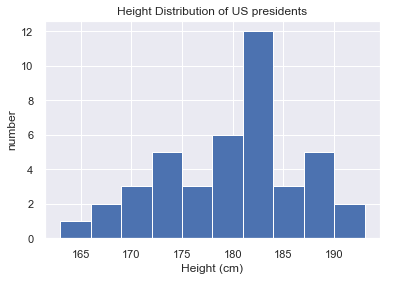

In [127]:
plt.hist(heights)
plt.title('Height Distribution of US presidents')
plt.xlabel('Height (cm)')
plt.ylabel('number')

# matplt 설정다시하기

이 집계는 탐색적 데이터 분석의 기본에 해당하는 것으로 이 책의 후반부에서 더 깊이 있게 알아볼 예정이다.

## 배열 연산: 브로드 캐스팅
앞에서 느린 파이썬 루프를 제거하기 위해 연산을 벡터화하는 NumPy의 유니버설 함수 사용법을 알아봤다. 벡터화 연산의 또 다른 방법은 NumPy의 브로드 캐스팅 기능을 사용하는 것이다. 브로드캐스팅은 단지 다른 크기의 배열에 이항 유니버설 함수(덧셈, 뺄셈, 곱셈 등)를 적용하기 위한 규칙의 집합일 뿐이다.

#### 브로드캐스팅 소개
같은 크기의 배열에서 이항 연산은 배열의 요소 단위로 수행된단느 점을 기억하자.

In [128]:
a = np.array([0, 1, 2])
b = np.array([5, 5, 5])
a + b

array([5, 6, 7])

브로드캐스팅을 사용하면 이러한 유형의 이항 연산을 서로 다른 크기의 배열에서 수행할 수 있다. 예를 들어, 배열에 스칼라(0차원 배열이라고 생각하면 된다)를 쉽게 더할 수 있다.

In [129]:
a + 5

array([5, 6, 7])

이것은 값 5를 배열 ``[5, 5, 5]``로 확장하거나 복제하고 그 결과를 더하는 연산으로 생각하면 된다. NumPy 브로드캐스팅의 이점은 이 값 복제가 실제로 발생하지 않는다는 것이다. 하지만 브로드캐스팅을 이러한 방식응로 생각하면 이해하기가 쉽다.
<br><br>
이것을 더 높은 차원의 배열로 확장할 수도 있다. 1차원 배열을 2차원 배열에 더할 때 어떤 결과가 나오는지 살펴보자.

In [130]:
M = np.ones((3, 3))
M

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

In [131]:
M + a

array([[1., 2., 3.],
       [1., 2., 3.],
       [1., 2., 3.]])

여기서 1차원 배열 a는 M의 형상에 맞추기 위해 두 번재 차원까지 확장 또는 브로드캐스팅된다.
<br><br>
이 예제들은 비교적 이해하기 쉽지만, 두 배열 모두 브로드캐스팅해야 하는 경우에는 더 복잡해진다. 다음 예제를 생각해 보자.

In [132]:
a = np.arange(3)
b = np.arange(3)[:, np.newaxis]
print(a)
print(b)

[0 1 2]
[[0]
 [1]
 [2]]


In [133]:
a + b

array([[0, 1, 2],
       [1, 2, 3],
       [2, 3, 4]])

이전 예제와 마찬가지로 하나의 값을 늘리거나 브로드캐스팅해서 다른 형상에 일치 시켰다. 이 예제에서는 공통 형상에 맞추기 위해 a와 b 모두 확장됐고, 그 결과 2차원 배열을 얻었다! 이 예제의 기하학적 구조는 그림 2-4와 같다.
![Broadcasting Visual](figures/02.05-broadcasting.png)
투명하게 보이는 박스는 브로드캐스팅된 값을 나타낸다. 다시 말하지만, 이 부가적 메모리는 그 연산 과정에서 실제로 할당 되지는 않지만 개념적으로 이렇게 상상하는 것이 이해하는 데 도움이 된다.
<br><br>
브로드 캐스팅 규칙
NumPy의 브로드 캐스팅은 두 배열 사이의 상호작용을 결정하기 위해 엄격한 규칙을 따른다.
- 규칙1: 두 배열의 차원 수가 다르면 더 적은 수의 차원을 가진 배열 형상의 앞쪽(왼쪽)을 1로 채운다.
- 규칙2: 두 배열의 형상이 어떤 차원에서도 일치하지 않는다면 해당 차원의 형상이 1인 배열이 다른 형상과 일치하도록 늘어난다.
- 규칙3: 임의의 차원에서 크기가 일치하지 않고 1도 아니라면 오류가 발생한다.
이 규칙을 좀 더 분명히 이해할 수 있도록 자세한 예제 몇 개를 살펴보자.

#### 브로드캐스팅 예제 1
1차원 배열에 2차원 배열을 더하는 것을 보자.


In [134]:
M = np.ones((2, 3))
a = np.arange(3)

이 두 배열 간의 연산을 생각해 보자, 각 배열의 형상은 다음과 같다.
    
    M.shape = (2,3)
    a.shape = (3,)
규칙 1에 따라 배열 a가 더 작은 차원을 가지므로 왼쪽을 1로 채운다.
    
    M.shape -> (2,3)
    a.shape -> (1, 3)
    
규칙 2에 따라 첫 번재 차원이 일치하지 않으므로 이 차원이 일치하도록 늘린다.
    
    M.shape -> (2,3)
    a.shape -> (2,3)
    
모양이 일치하면 최종 형상이 (2, 3)이 된다는 것을 알 수 있다.

In [135]:
M + a

array([[1., 2., 3.],
       [1., 2., 3.]])

#### 브로드캐스팅 예제 2
이번에는 두 배열 모두 브로드캐스팅이 필요한 예제를 보자.

In [136]:
a = np.arange(3).reshape((3, 1))
b = np.arange(3)

다시 배열의 형상부터 확인하자.
   
    a.shape = (3, 1)
    b.shape = (3,)

규칙 1에 따라 b의 형상에 1을 덧붙여야 한다.

    a.shape -> (3, 1)
    b.shape -> (1, 3)
    
그리고 규칙 2에 따라 각 차원을 그에 대응하는 다른 크기에 일치하도록 늘린다.

    a.shape -> (3, 3)
    b.shape -> (3, 3)

결과가 일치하기 대문에 이 형상들은 다음과 같이 서로 호환된다.

In [137]:
a + b

array([[0, 1, 2],
       [1, 2, 3],
       [2, 3, 4]])

#### 브로드캐스팅 예제 3
두 개의 배열이 호환되지 않는 경우의 예제를 살펴보자.

In [138]:
M = np.ones((3, 2))
a = np.arange(3)

이 예제는 첫 번째 예제와 약간 다른 경우다. 행렬 M의 형상이 뒤바뀌었다. 이것이 계산에는 어떤 영향을 끼칠까? 배열의 형상은 다음과 같다.
    
    M.shape = (3.2)
    a.shape = (3.)
    
다시 규칙 1 에 따라 a의 형상에 1을 채운다.

    m.shape -> (3, 2)
    a.shape -> (1, 3)
    
규칙 2에 따라 a의 첫 번째 차원을 M의 첫번째과 일치하도록 늘린다.

    M.shape -> (3, 2)
    a.shpae -> (3, 3)
    
이제 규칙 3에서 최종 형상이 서로 일치하지 않으므로 이 두 배열은 호환되지 않는다. 다음 연산을 시도해 보면 그 사실을 확인할 수 있다.

In [139]:

'''
M + a
ValueError                                Traceback (most recent call last)
<ipython-input-140-8cac1d547906> in <module>()
----> 1 M + a

ValueError: operands could not be broadcast together with shapes (3,2) (3,) 
'''

'\nM + a\nValueError                                Traceback (most recent call last)\n<ipython-input-140-8cac1d547906> in <module>()\n----> 1 M + a\n\nValueError: operands could not be broadcast together with shapes (3,2) (3,) \n'

여기서 a의 형상에 왼쪽이 아니라 오른쪽에 1 을 덧붙이면 a와 M이 서로 호환될 수 있지 않을까하는 생각에 혼란스렁루 수도 있다. 그러나 브로드캐스팅은 그런 방식으로 동작하지 앟는다. 그런 종류의 유연성이 유용한 경우도 있겠지만 모호함이 생길 여지가 있다. 오른쪽 덧붙이기를 원한다면 명시적으로 배열의 형상을 변경하면 된다.

In [140]:
a[:, np.newaxis].shape

(3, 1)

In [141]:
M + a[:, np.newaxis]

array([[1., 1.],
       [2., 2.],
       [3., 3.]])

이 예제에서는 + 연산자를 중점적으로 사용했지만, 이 브로드캐스팅 규칙은 모든 이항 ufunc에 적용된다. 예를  들면, 다음과 같이 ``long(exp(a) + exp(b))``를 기본 방식보다 더 정확하게 계산하는 ``logaddexp(a, b)`` 함수가 있다.

In [142]:
np.logaddexp(M, a[:, np.newaxis])

array([[1.31326169, 1.31326169],
       [1.69314718, 1.69314718],
       [2.31326169, 2.31326169]])

#### 실전 브로드캐스팅
브로드캐스팅 연산은 이 책 전체에서 보게 될 수많은 예제의 핵심이다. 이제 이 연산이 유용하게 쓰이는 몇 가지 간단한 예제를 살펴보자.

#### 배열을 중앙 정렬하기
앞에서 ufunc을 사용하면 NumPy 사용자가 느린 파이썬 루프를 명시적으로 작성하지 않아도 된다는 사실을 알았다. 브로드캐스팅은 이 능령을 확장한다. 흔히 볼 수 있는 예는 데이터 배열을 중앙 정렬하는 것이다. 10개의 관측치로 이뤄진 배열이 있고 각 관측치는 3개의 값으로 구성된다고 생각해보자. 표준 표기법을 참고해 10x3 배열에 이 데이터를 저장할 것이다.

In [143]:
X = np.random.random((10, 3))

mean 집계 함수를 사용해 첫 번재 자원의 특성별 평균값을 계산할 수 있다.

In [144]:
Xmean = X.mean(0)
Xmean

array([0.49831076, 0.50193438, 0.46752888])

이제 평균값을 뺌으로써 X 배열의 중앙 정렬 할 수 있다 (이것이 브로드캐스팅 연산이다.)

In [145]:
X_centered = X - Xmean
X_centered.mean(0)

array([-4.44089210e-17,  3.33066907e-17, -9.43689571e-17])

제대로 됐는지 확인하려면 중앙 정렬된 배열의 평균 연산이 거의 0에 가까운지 확인하면 된다.
<br><br>
기계 정밀도 내에서 평균값이 0이다.

#### 2차원 함수 플로팅 하기
브로드캐스팅은 2차원 함수를 기반으로 이미지를 그릴 대도 매우 유용하다. 함수를 정의하고 싶다면 브로드캐스팅을 사용해 그리드에 이 함수를 계산할 수 있다.

In [146]:
# x 와 y는 0에서 5까지 50단계로 나눈 배열임
x = np.linspace(0, 5, 50)
y = np.linspace(0, 5, 50)[:, np.newaxis]
z = np.sin(x)**10 + np.cos(10 + y * x) * np.cos(x)

 2차원 배열을 플로팅(plotting)하는데 Matplotlib을 사용할 것이다

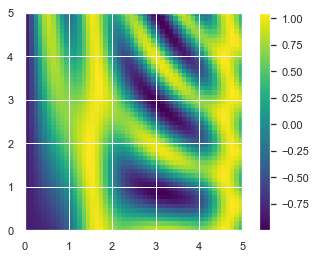

In [147]:
import matplotlib.pyplot as plt
plt.imshow(z, origin='lower', extent=[0, 5, 0, 5], cmap='viridis')
plt.colorbar()

결과는 그림 2-5에서 보는 것처럼 2차원 함수를 강렬한 색상으로 시각화해서 보여준다.

## 비교, 마스크, 부울 로직
이번 절에선느 NumPy 배열 내의 값을 검사하고 좆가한느 데 부울 마스크를 사용한느 법을 다룬다. 마스킹은 특정 기준에 따라 배열의 값을 추출하거나, 수정, 계산, 조작할 때 사용한다. 특정 값보다 더 큰 값을 모두 세거나 특정 임계치를 넘어서는 이상치를 모두 제거하려는 경우가 여깅 ㅔ해당한다. NumPy에서 부울 마스킹은 종종 이러한 유형의 작업을 수행하기에 가장 효율적인 방법이다.

#### 예제: 비온 날 세기
어느 도시의 일 년간 일일 강수량을 표시한 일련의 데이터를 가지고 있다고 하자. 예를 들어, 여기서는 Pandas를 이용해 2014년 시애틀의 일일 강수량 통계리츨 불러올 것이다.

In [148]:
import numpy as np
import pandas as pd
# Pandas를 이용해 인치 단위의 강수량 데이터를 NumPy 배열로 추출
rainfall = pd.read_csv('data/Seattle2014.csv')['PRCP'].values
inches = rainfall / 254  # 1/10mm -> inches
inches.shape

(365,)

배열에는 2014년 1월 1일부터 12월 31일까지 인치 단위의 일일 강수량을 나타내는 365개의 값이 들어 있다.
<br><br>
우선 간단학 ㅔ시각화하기 위해 Matplotplib을 이용해 만든 비온 날의 히스토그램(그림 2-6)을 보자.

(array([245.,  14.,  13.,  17.,   8.,   6.,   5.,   6.,   4.,   3.,   7.,
          6.,   3.,   3.,   3.,   4.,   4.,   2.,   4.,   0.,   0.,   1.,
          1.,   1.,   0.,   0.,   0.,   2.,   1.,   1.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([0.        , 0.04596457, 0.09192913, 0.1378937 , 0.18385827,
        0.22982283, 0.2757874 , 0.32175197, 0.36771654, 0.4136811 ,
        0.45964567, 0.50561024, 0.5515748 , 0.59753937, 0.64350394,
        0.6894685 , 0.73543307, 0.78139764, 0.8273622 , 0.87332677,
        0.91929134, 0.96525591, 1.01122047, 1.05718504, 1.10314961,
        1.14911417, 1.19507874, 1.24104331, 1.28700787, 1.33297244,
        1.37893701, 1.42490157, 1.47086614, 1.51683071, 1.56279528,
        1.60875984, 1.65472441, 1.70068898, 1.74665354, 1.79261811,
        1.83858268]),
 <a list of 40 Patch objects>)

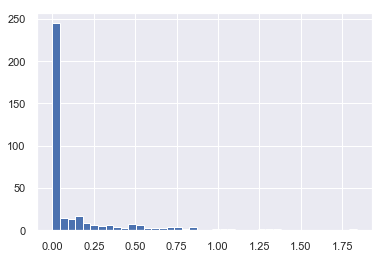

In [149]:
import seaborn
seaborn.set()
plt.hist(inches, 40)

이 히스토그램은 데이터가 어떤 모습인지 대략 떠올리게 해준다. 비가 많이 오기로 유명한 시애틀이지만 2014년에는 대다수 날에 강수량이 0에 가까운 모습을 볼 수 있다. 그렇지만 이 그래프는 '그해 비가 온 날은 며칠일까?, 비 오는 날의 평균 강수량은 얼마인가? 0.5인치 이상 비가 온 날은 며칠이나 될까?' 등 우리가 알고자 하는 정보를 전달하기에는 적합하지 않다.
<br><br>
#### 세부 분석
이 문제를 해결할 수 있는 한 가지 접근 방식은 그 질문들에 직접 답한느 것이다. 데이터를 처음부터 끝가지 확인하면서 원하는 범위 안에 있는 값을 볼대마다 캉누털르 1씩 증가하는 것이다. 이번 장에서 설명한 여러가지 이유로 그런 접근 방식은 콛 ㅡ작성 시간과 결과 계산 측면에서 매우 비효율 적이다. NumPy 배열연산의 유니버설 함수에서 루프 대신 NumPy 유니버설 함수를 사용해 배열의 요소 단위 산술 연산을 빠르게 수행할 수 있다는 것을 알았다. 같은 방식으로 다른 ufunc를 사용해 배열에서 요소 단위로 비교하면 궁금해하는 질문에 댛나 답을 얻을 ㅅ ㅜ있다. 잠시 데이터는 접어두고 이러한 유형의 질문에 신속하게 답하기 위해 마스킹을 사용하는 NumPy의 일반적인 도구 몇 가지를 살펴보자

#### ufunc으로서의 비교 연산자
유버서설 함수를 소개하면서 특히 산술 연산자에 대해 집중적으로 알아봤다. 배열에 +, -, *, / 등을 사용하면 요소 단위의 연산이 이뤄진단느 것을 배웠다. 또한,  NumPy는 요소 단위의 유니버설 함수로 <(보다 작음)과 >(보다 큼) 같은 비교 연산자도 구현한다. 이 비교 연산자으 ㅣ결과는 항상 부울 타입의 배열이다. 표준 비교 연산자 여섯 개 모두 사용할 수 있다.

In [150]:
x = np.array([1, 2, 3, 4, 5])
print(x < 3)
print(x > 3)
print(x <= 3)
print(x >= 3)
print(x != 3)

[ True  True False False False]
[False False False  True  True]
[ True  True  True False False]
[False False  True  True  True]
[ True  True False  True  True]


또한 두 배열을 항목별로 비교할 수 있으며 복합 표현식을 적용할 수도 있다.

In [151]:
(2 * x) == (x**2)

array([False,  True, False, False, False])

산술 연산자와 마찬가지로 비교 연산자도 NumPy의 ufunc로 구현된다. 예를 들어, x<3이라고 쓰면 NumPy는 내부적으로 np.less(x, 3)을 사용한다. 다음은 비교 연산자와 그에 대응하는 ufunc를 정리한 것이다.

| Operator	    | Equivalent ufunc    | Operator	   | Equivalent ufunc    |
|---------------|---------------------|---------------|---------------------|
|``==``         |``np.equal``         |``!=``         |``np.not_equal``     |
|``<``          |``np.less``          |``<=``         |``np.less_equal``    |
|``>``          |``np.greater``       |``>=``         |``np.greater_equal`` |



산술 ufunc와 마찬가지로 이것들도 모든 크기와 형상의 배열에 적용된다. 다음은 2차원 예제다.

In [152]:
rng = np.random.RandomState(0)
x = rng.randint(10, size=(3, 4))
x

array([[5, 0, 3, 3],
       [7, 9, 3, 5],
       [2, 4, 7, 6]])

In [153]:
x < 6

array([[ True,  True,  True,  True],
       [False, False,  True,  True],
       [ True,  True, False, False]])

각 결과는 부울 배열이며, NumPy는 이 부울 결과로 작업하기 위한 간단한 패턴을 다양하게 제공한다.

#### 부울 배열로 작업하기
부울 배열이 있을 때 여러 가지 유용한 연산을 수행할 수 있다. 전에 만들었던 2차원 배열 x로 실습해 보자.

In [154]:
print(x)

[[5 0 3 3]
 [7 9 3 5]
 [2 4 7 6]]


 #### 요소 개수 세기
 부울 배열에서 True인 요소의 개수를 세는 데는 ``np.count_nonzero`` 가 유용하다

In [155]:
# 6보다 작은 값은 몇 개일까?
np.count_nonzero(x < 6)

8

6보다 작은 배열 요소가 8개 있다는 것을 알았다. 이 정보를 알아낸느 또 다른 방법은 np.sum을 사용하는 것인데 이 경우 False는 0으로, True는 1로 해석된다.

In [156]:
np.sum(x < 6)

8

Sum()의 장점은 다른 NumPy 집계 함수와 같이 행이나 열을 따라 계산할 수도 있다는 점이다.

In [157]:
# 각 행에 6보다 작은 값이 몇 개일까?

In [158]:
np.sum(x < 6, axis=1)

array([4, 2, 2])

이 코드는 행렬에서 각 행의 6 보다 작은 값의 개수를 센다.

값 중 하나라도 참이 있는지나 모든 값이 참인지 빠르게 확인하고 싶다면 np.any()나 np.all()을 사용하면 된다.

In [159]:
# 8보다 큰 값이 하나라도 있는가?
print(np.any(x > 8))

# 8보다 작은 값이 하나라도 있는가?
print(np.any(x < 8))

# 모든 값이 10보다 작은가?
print(np.all(x < 10))

# 모든 값이 6과 같은가?
print(np.all(x == 6))

True
True
True
False


np.all()과 np.any()는 특정 축을 따라 사용할 수도 있다. 예를 들면 다음과 같다.

In [160]:
# 각 행의 모든 값이 8 보다 작은가?
np.all(x < 8, axis=1)

array([ True, False,  True])

첫 번재와 세 번째 행의 모든 요소는 8보다 작지만, 두 번째 행은 그렇지 않다는 것을 알 수 있다.
<br><br>
마지막으로 주의할 점은 파이썬은 내장 함수로 sum(), any(), all() 함수를 가지고 있다는 사실이다. 이것들은 NumPy 함수와는 다른 구문을 가지고 있으며, 특히 다차원 배열에서 사용할 때 실패하거나 의도하지 않은 결과를 마들어낼 것이다. 위 예제에서는 반드시 
np.sum(), np.any(), np.all()을 사용하자.

#### 부울 연산자
앞에서 이미 비가 4인치보다 적게 내린 날이나 2인치보다 많이 내린 날을 어떻게 셀 수 있는지 살펴 봤다. 그렇다면 비가 4인치보다 적고 1인치 보다 많이 온 날을 알 수 있을까? 그 답은 파이썬의 비트 단위 로직 연산자 &, |, ^, ~를 통해 얻을 수 있다. 표준 산술 연산자와 마찬가지로 NumPy는 이 연산자를(일반적으로 부울)배열의 요소 단위로 동작하는 유니버설 함수로 오버로딩한다.
<br><br>
예를 들어, 이러한 복합적인 문제는 다음과 같이 해결할 수 있다.

In [161]:
np.sum((inches > 0.5) & (inches < 1))

29

이로써 0.5인치와 1.0인치 사이의 강수량을 보인 날이 29일임을 알게 됐다.
<br><br>
여기서는 괄호가 중요하다는 사실을 명심하라. 연산자 선행 규칙에 따라 이 표현식에서 괄호를 제거하면 다음과 같이 연산이 수행되어 결국 에러가 발생한다.

    inches > (0.5 & inches) < 1
A AND B와 NOT(A OR B)가 같음을 이용하면 다른 방식으로도 같은 결과를 계산할 수 있다.


In [162]:
np.sum(~((inches <= 0.5) | (inches >= 1)))

29

배열에서 비교 연산자와 부울 연산자를 결합하면 여러 가지 효율적인 로직 연산을 할 수 있다.
다음 표에 비트 단위 부울 연산자와 그에 상응하는 유니버설 함수를 요약했다.

| Operator	    | Equivalent ufunc    | Operator	    | Equivalent ufunc    |
|---------------|---------------------|---------------|---------------------|
|``&``          |``np.bitwise_and``   |``&#124;``     |``np.bitwise_or``    |
|``^``          |``np.bitwise_xor``   |``~``          |``np.bitwise_not``   |

이 도구를 사용해 날시 데이터에 대한 질문의 답을 찾을 수 있다. 여기에 마스킹과 집계 함수를 결합햇 ㅓ계산할 수 있는 결괏값에 대한 몇 가지 예제를 소개한다.

In [163]:
print("Number days witout rain:        ", np.sum(inches == 0))
print("Number days with rain:          ", np.sum(inches != 0))
print("Days with mort than 0.5 inches: ", np.sum(inches > 0.5))
print("Rainy days with < 0.1 inches :  ", np.sum((inches > 0) & (inches < 0.2)))

Number days witout rain:         215
Number days with rain:           150
Days with mort than 0.5 inches:  37
Rainy days with < 0.1 inches :   75


#### 마스크로서의 붕루 배열
앞에서 부울 배열에서 직접 계산한느 집계 함수를 살펴봤다. 더 강력한 패턴은 부울 배열을 마스크로 사용해 데이터 자체으 ㅣ특정 부분 집합을 선택하는 것이다. 앞에서 생성한 x 배열로 돌아가 5 보다 작은 배열 내 값들을 몯 ㅜ구한다고 생각해 보자.

In [164]:
x

array([[5, 0, 3, 3],
       [7, 9, 3, 5],
       [2, 4, 7, 6]])

In [165]:
x < 5

array([[False,  True,  True,  True],
       [False, False,  True, False],
       [ True,  True, False, False]])

이제 배열에서 조건에 맞는 값들을 선택하려면 간단히 이 부울 배열ㅇ르 인덱스로 사용하면 된다. 이를 마스킹 연산이라고 한다.

In [166]:
x[x < 5]

array([0, 3, 3, 3, 2, 4])

변환된 값은 이 조건에 맞는 몯느 값, 다시 말해 마스크 배열이 True인 위치에 있는 모든 값으로 채워진 1차원 배열이다
<br><br>
이제 원한느 대로 이 값들에 대해 자유롭게 연산을 수행할 수 있다. 예를 들어, 시애틀 강수량에 관한 몇가지 관련 통계치를 계산할 수 있다.

In [167]:
# 비가 온 모든 날에 대한 마스크 생성
rainy = (inches > 0)
# 여름에 해당하는 날에 대한 마스크 생성(6월 21일은 172번째 날임)
summer = (np.arange(365)-172 < 90) & (np.arange(365) - 172 > 0)
print("Median precip on rainy days in 2014 (inches)   : ", np.median(inches[rainy]))
print("Median precip on summer days in 2014 (inches)  : ", np.median(inches[summer]))
print("Maximum precip on summer days in 2014 (inches) : ", np.max(inches[summer]))
print("Median precip on non-summer raniny days (inces): ", np.median(inches[rainy & ~summer]))

Median precip on rainy days in 2014 (inches)   :  0.19488188976377951
Median precip on summer days in 2014 (inches)  :  0.0
Maximum precip on summer days in 2014 (inches) :  0.8503937007874016
Median precip on non-summer raniny days (inces):  0.20078740157480315


부울 연산과 마스킹 연산, 집계 연산을 결합하면 이렇나 종류의 질문에 매우 빠르게 답할 수 있다.

#### 키워드 and/or vs 연산자 &/| 사용하기
흔히 혼동한느 것 중 하나가 키워드 and/or와 연산자 &/|의 차이다. 언제 어느 것을 ㅅ ㅏ용할 것인가?
둘의 차이점은 and와 or는 전체 객체의 참과 거짓을 측정하는 반면 &와 |는 각 객체의 비트를 참조한다는 사실에 있다.
and나 or를 사용하는 것은 파이썬에 그 객체를 하나의 부울 요소로 취급해달라고 요청하는 것과 마찬가지다. 파이썬에서 모든 0이 아닌 정수는 다음과 같이 True로 간주한다.


In [168]:
print(bool(42), bool(0))
print(42 and 0)
print(42 or 0)

True False
0
42


&와 |를 정수에 사용할 때 표현식은 그 요소의 비트에 대해 동작하므로 그 숫자를 구성하는 개별 비트에 and와 or를 적용하는 것과 같다.

In [169]:
print(bin(42))
print(bin(59))
print(bin(42 & 59))
print(bin(42 | 59))

0b101010
0b111011
0b101010
0b111011


결과를 산출하기 위해 이진 표현에서 대응하는 비트를 비교한다는 점을 알아두자.
NumPy의 부울 배열을 가지고 있다면 이를 1 = True, 0 = False인 비트로 이뤄진 문자열로 생각할 수 있고, &와 |의 결과는 이전과 비슷한 방식으로 동작한다.

In [170]:
A=np.array([1,0,1,0,1,0], dtype=bool)
B=np.array([1,1,1,0,1,1], dtype=bool)
A|B

array([ True,  True,  True, False,  True,  True])

이 배열에 or를 사용하는 것은 전체 배열 객체의 참이나 거짓을 평가하려는 것으로서 잘 정의된 값은 아니다.

``A or B``

---------------------------------------------------------------------------
ValueError                                Traceback (most recent call last)
<ipython-input-173-ea2c97d9d9ee> in <module>()
----> 1 A or B

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

이와 유사하게 특정 배열에 부울 표현식을 사용할 땐느 or나 and 대신 |나 &을 사용해야 한다.

In [171]:
x = np.arange(10)
(x>4) & (x <8)

array([False, False, False, False, False,  True,  True,  True, False,
       False])

전체 배열의 참이나 거짓을 평가하려고 하면 전에 본 것과 동일한 valueError가 발생할 것이다.

``(x>4) and (x < 8)``

---------------------------------------------------------------------------
ValueError                                Traceback (most recent call last)
<ipython-input-175-85dc4ff1aa22> in <module>()
----> 1 (x>4) and (x < 8)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

그러니 이것만 기억하자. and와 or는 전체 객체에 대해 단일 부울 평가를 수행하며, &와 |는 객체의 내용(개별 비트나 바이트)에 대해 여러 번 부울 평가를 수행한다. 부울 NumPy 배열에서는 대부분 후자를 선호한다.

## 팬시 인덱싱
앞에서 간단한 인덱스(예:arr[0])와 슬라이스(예: arr[:5]), 부울 마스크(예:arr[arr>0])를 사용해 배열의 일부에 접근하고 그것을 수정하는 법을 살펴봤다. 이번 절에서는 팬시 인덱싱이라고 하는 다른 유형의 배열 인덱싱에 대해 알아보겠다. 팬시 인덱싱은 이미 살펴본 단순 인덱싱과 비슷하지만 단일 스칼라 대신 인덱스 배열을 전달한다. 이로써 복잡한 배열 값의 하위 집합에 매우 빠르게 접근해 그것을 수정할 수 있다.

#### 팬시 인덱싱 알아보기
팬시 인덱싱은 개념적으로 간단하다. 즉, 한번에 여러 배열 요소에 접근하기 위해 인덱스의 배열을 전달한다. 예를 들어 다음 배열을 생각해 보자.

In [172]:
import numpy as np
rand = np.random.RandomState(42)
x = rand.randint(100, size=10)
print(x)

[51 92 14 71 60 20 82 86 74 74]


세 개의 다른 요소에 접근하고자 하는 경우, 다음과 같이 할 수 있다.

In [173]:
[x[3], x[7], x[2]]

[71, 86, 14]

아니면 인덱스의 단일 리스트나 배열을 전달해 같은 결과를 얻을 수도 있다.


In [174]:
ind = [3, 7, 4]
x[ind]

array([71, 86, 60])

팬시 인덱싱을 이용하면 결과의 형상이 인덱싱 대상 배열의 형상이 아니라 인덱스 배열의 형상을 반영한다.

In [175]:
ind = np.array([[3,7],[4,5]])
x[ind]

array([[71, 86],
       [60, 20]])

 팬시 인덱싱은 여러 차원에서도 동작한다. 다음 배열을 생각해보자.

In [176]:
X = np.arange(12).reshape((3,4))
X

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

표준 인덱싱을 사용할 때와 마찬가지로, 첫 번째 인덱스는 행을 말하며 두 번째 인덱스는 열을 말한다.

In [177]:
row = np.array([0,1,2])
col = np.array([2, 1, 3])
X[row, col]

array([ 2,  5, 11])

결과의 첫 번재 값은 X[0, 2], 두 번째 값은 X[1, 1], 세 번째 값은 X[2, 3]이다. 팬시 인덱싱에서 인덱스 쌍을 만드는것은 브로드 캐스팅 규칙을 따른다. 따라서 인덱스 내의 열 벡터와 행 벡터를 결합하면 2차원 결과를 얻는다.

In [178]:
X[row[:, np.newaxis], col]

array([[ 2,  1,  3],
       [ 6,  5,  7],
       [10,  9, 11]])

여기서 각 행의 값은 산술 연산의 브로드캐스팅에서 본 것과 똑같이 각 열 벡터와 일치한다. 예를 들면 다음과 같다.

In [179]:
# row array([0, 1, 2])
print(row[:, np.newaxis])
row[:, np.newaxis] * col

[[0]
 [1]
 [2]]


array([[0, 0, 0],
       [2, 1, 3],
       [4, 2, 6]])

팬시 인덱싱을 사용하면 반환값은 인덱싱 대상 배열의 형상이 아니라 브로드캐스팅된 인덱스의 형상을 반영한다는 사실을 반드시 기억하자.

#### 결합 인덱싱
더 강력한 연산을 위해 팬시 인덱싱을 앞에서 본 다른 인덱싱 방식과 결합할 수 있다.

In [180]:
print(X)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]


팬시 인덱스와 단순 인덱스를 결합할 수 있다.

In [181]:
X[2, [2,0,1]]

array([10,  8,  9])

또한 팬시 인덱싱과 슬라이싱을 결합할 수 있다.

In [182]:
mask=np.array([1,0,1,0], dtype=bool)
X[row[:, np.newaxis], mask]

array([[ 0,  2],
       [ 4,  6],
       [ 8, 10]])

이렇게 결합된 인덱싱 방식은 모두 배열값에 접근하고 수정하기에 매우 유연한 연산을 수행하게 해준다.

#### 예제: 임의의 점 선택하기
팬시 인덱싱의 보편적인 용도는 행렬에서 부분집합을 선택하는 것이다. 예를 들어, 2차원 정규분포에서 뽑아낸 다음 점들처럼 D차원에 N개의 점을 표시하는 NxD행렬이 있다고 해보자

In [183]:
mean=[0,0]
cov =[[1,2],[2,5]]
X=rand.multivariate_normal(mean, cov, 100)
X.shape

(100, 2)

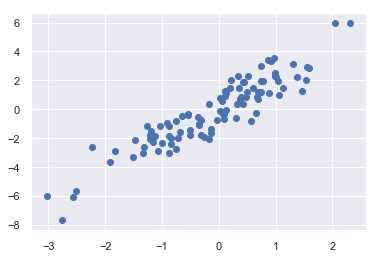

In [184]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()
plt.scatter(X[:, 0], X[:, 1]);

팬시 인덱싱을 이용해 임의의 점 20개를 선택하자. 우선 반복없이 임의로 인덱스를 20개 선ㄴ택하고 그 인덱스를 사용해 원본 배열의 일부를 선택한다.

In [185]:
indices = np.random.choice(X.shape[0], 20, replace=False)
indices

array([22, 34, 30, 40, 27, 12, 65,  5, 54, 74, 78, 96, 70, 18, 72, 89, 29,
       45, 36, 88])

In [186]:
selection = X[indices] #여기서 팬시 인덱싱 사용
selection.shape

(20, 2)

이제 어느 점이 선택됐는지 보기 위해 선택된 점 위에 큰 동그라미를 표시하자

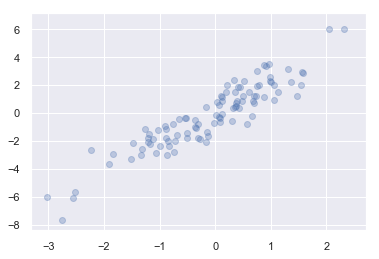

In [187]:
plt.scatter(X[:, 0], X[:, 1], alpha=0.3)
plt.scatter(selection[:, 0], selection[:, 1], facecolor='none', s=200);

이러한 전략은 통계 모델 검증을 위해 훈련/테스트 집단을 분할하거나 통계적 질문에 답하기 위해 샘플링할 때 종종 필요한 데이터를 신속하게 분할하는 데 자주 사용된다.

#### 팬시 인덱싱으로 값 변경하기
팬시 인덱싱이 배열의 일부에 접근하는데 사용되는 것과 마찬가지로 배열의 일부를 수정하는 데도 사용 될 수 있다. 예를 들어, 인덱스 배열이 있고 배열에서 그 인덱스 배열에 해당하는 항목에 특정 값을 설정하고 싶다고 하자.

In [188]:
x = np.arange(10)
i = np.array([2,1,8,4])
x[i]=99
print(x)

[ 0 99 99  3 99  5  6  7 99  9]


이를 위해 할당 유형의 연산자는 모두 사용할 수 있다. 예를 들면 다음과 같다.

In [189]:
x[i] -= 10

print(x)

[ 0 89 89  3 89  5  6  7 89  9]


그렇지만 이 연산에서 반복되는 인덱스는 예상하지 못한 결과를 초래할 수도 있다. 다음 경우를 생각해 보자.

In [190]:
x = np.zeros(10)
x[[0, 0]] = [4,6]
print(x)

[6. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


``4`` 는 어디로 갔을까? 이 연산의 결과는 먼저 x[0]=4 가 할당되고 그 다음에 x[0]=6이 할당됐다. 물론 그 결과는 x[0]이 값 6을 갖는 것이다.
<br><br>
여기까지는 그렇다 치자. 하지만 이 연산을 생각해보자.

In [191]:
i = [2,3,3,4,4,4]
x[i]+=1
x

array([6., 0., 1., 1., 1., 0., 0., 0., 0., 0.])

이 경우 각 인덱스가 반복되는 횟수에 따라 x[3]이 값 2를 포함하고 x[4]가 값 3을 포함할 거라고 예상할 것이다. 그런데 왜 그렇지 않을까? 개념적으로 이것은 x[i]+=1이  x[i] = x[i] + 1 의 축약형을 의미하기 때문이다. x[i] + 1 이 평가되고 나면 결과가 x의 인덱스에 할당된다. 이 점을 생각하면 그것은 여러차례 일어나는 증가가 아니라 할당이므로 보기와는 다른 결과를 가져온다.


그렇다면 연산이 반복되는 곳에 다른 행동을 원한다면 어떻게 될까? 이렇나 경우에는 유니버설 함수의 at() 메서드를 사용해 다음과 같이 하면 된다.

In [192]:
x = np.zeros(10)
np.add.at(x, i, 1)
print(x)

[0. 0. 1. 2. 3. 0. 0. 0. 0. 0.]


at()메서드는 지정한값(여기에서는 1)을 가진 특정 인덱스(i)에 해당하는 연산자를 즉시 적용한다. 이것과 개념상 비슷한 다른 메서드로는 유니버설 함수의 reduceat() 메서드가 있다. 이 메서드에 대해서는 NumPy 문서를 참고한다.


#### 예제: 데이터 구간화
이 아이디어를 이용하면 데이터를 효율적으로 구간화(binning)해서 직접 히스토그램을 생성할 수 있다. 가령 1,000개의 값이 있고 그 값들이 구간 배열에서 어디에 속한느지 빠르게 찾고 싶다고 하자. 다음과 같이 ufunc.at을 이용해 그것을 계산할 수 있다.

In [193]:
np.random.seed(42)
x = np.random.randn(100)
#직접 히스토그램 계산하기
bins = np.linspace(-5, 5, 20)
counts = np.zeros_like(bins)
# 각 x에 대한 적절한 구간 찾기
i = np.searchsorted(bins, x)
#각 구간에 1 더하기
np.add.at(counts, i, 1)

이제 집계값인 counts는 각 구간 내에 포함된 점의 개수, 즉 히스토그램을 나타낸다.

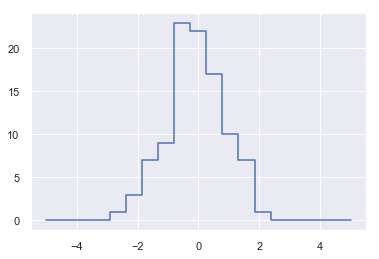

In [194]:
plt.plot(bins, counts, linestyle='steps');

물론 히스토그램을 그릴 때마다 이 과정을 직접 수행하는 것은 바보 같은 짓이다. Matplotlib이 한 줄로 동일한 결과를 내는 plt.hist()루틴을 제공하는 이유가 바로 여기에 있다.

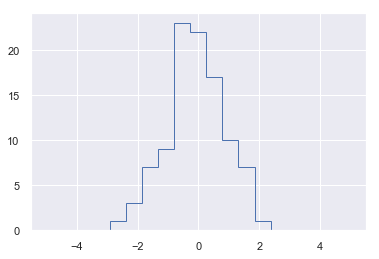

In [195]:
plt.hist(x, bins, histtype='step');

이 함수는 위 플롯과 거의 동일한 플롯을 만들어낼 것이다. Matplotlib은 구간화를 계산하기 위해 위에서 했던 연산과 매우 비슷한 연산을 수행하는 np.histogram 함수를 사용한다. 그럼 이 둘을 비교해보자.

In [196]:
print("NumPy routine:")
%timeit counts, edges = np.histogram(x, bins)
print("Custom routine:")
%timeit np.add.at(counts, np.searchsorted(bins, x), 1)

NumPy routine:
21 µs ± 868 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)
Custom routine:
14.7 µs ± 906 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


직접 작성한 한 줄짜리 알고리즘이 NumPy의 최적화된 알고리즘보다 몇 배 더 빠르다! 어떻게 이것이 가능할까? np.histogram 소스코드를 들여다보면 루틴이 간단히 검색하고 세는 것보다 더 많은 일을 한다는 것을 알 수 있다. 그 이유는 NumPy 알고리즘이 더 유연하고, 특히 데이터 포인트 개수가 많아질 때 성능이 더 좋아지도록 설계돼 있기 때문이다.


In [197]:
x = np.random.randn(1000000)
print("NumPy routine:")
%timeit counts, edges = np.histogram(x, bins)

print("Custom routine:")
%timeit np.add.at(counts, np.searchsorted(bins, x), 1)

NumPy routine:
58.3 ms ± 2.1 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
Custom routine:
113 ms ± 737 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


이 비교는 알고리즘 효율성은 결코 간단한 문제가 아님을 보여준다. 대규모 데이터에서 효율적인 알고리즘이 소규모 데이터에서는 최선의 방식이 아닐 수 있으며 그 반대도 마찬가지다. 하지만 이 알고리즘을 직접 코딩하는 것의 장점은 이렇나 기본적인 메서드를 이해하면 그러한 기본 구성요소를 이용해 매우 흥미롱누 사용자 정의 행위를 하도록 확장할 수 있다는 점이다. 데이터 집약적인 애플리케이션에서 파이썬을 효율적으로 사용하려면 np.histogram 같이 편맇나 일반적인 루틴과 언제 그것들이 필요한지 아는 것은 물론이고 좀 더 세밀한 행위가 필요할 때 저수준 기능ㅇ을 사용하는 방법을 알아야 한다.

#### 배열 정렬
지금까지 주로 NumPy로 배열 데이터에 접근하고 연산을 수행하는 도구를 살펴봤다 이번 절에서는 NumPy 배열의 값을 정렬하는 알고리즘을 다루겠다. 이 알고리즘은 컴퓨터과학 입문 과정의 단골 주제로, 강의를 들어본 독자라면 아마도 꿈에서 삽입 정렬, 선택 정렬, 병합 정렬, 퀵 정렬, 버블 정렬 등을 수행해 본 적이 있을 것이다. 이 알고리즘은 모두 리스트나 배열으 ㅣ값을 정렬하는 비슷한 작업을 수행한다.
<br><br>
예를 들어, 간단한 선택 정렬은 리스트의 최솟값을 반복적으로 찾아서 리스트가 정렬될 때까지 값을 교환한다. 파이썬으로는 몇 줄만 코딩하면 된다.

In [198]:
import numpy as np
def selection_sort(x):
    for i in range(len(x)):
        swap = i + np.argmin(x[i:])
        (x[i], x[swap]) = (x[swap], x[i])
    return x

In [199]:
x = np.array([2,1,4,3,5])
selection_sort(x)

array([1, 2, 3, 4, 5])

컴퓨터 과학 전공 1년차 학생이라면 선택 정렬은 로직이 단순하다는 점에서 유용하지만 배열이 큰 경우에는 너무 느려서 쓸모가 없다고 말할 것이다. N개의 값을 가진 리스트의 경우 N번 반복해야 하며, 매 회 교환할 값을 찾기 위해 대략 ~N회 비교를 수행한ㄴ다. 이 알고리즘의 특징을 기술할 때 자주 사용되는 대문자 O 표기법에서 보면 선택 정렬은 평균의 복잡도를 갖는다. 리스트의 항목 개수가 2배가 되면 실행 시간은 4배로 늘어날 것이다.

그러나 이러한 선택 정렬도 고전적인 정렬 알고리즘은 보고 정렬(bogosort)보다는 훨씬 낫다

In [200]:
def bogosort(x):
    while np.any(x[:-1] > x[1:]):
        np.random.shuffle(x)
    return x
x = np.array([2,1,4,3,5])
bogosort(x)

array([1, 2, 3, 4, 5])

이 멍청한 정렬 방법은 순전히 운에 의존한다. 이 방식은 결과가 정렬될 때까지 반복적으로 배열을 임의로 섞는다. 편균 복잡도가 O[NxN!]라서 이 알고리즘은 당연히 실제 계산에서는 절대 사용하지 않는다.

다행이도 파이썬에는 방금 보여준 간단한 알고리즘보다 훨씬 더 효율적인 정렬 알고리즘이 내장돼 있다. 먼저 파이썬 내장 알고리즘을 살펴보고 NumPy에 포함된 NumPy 배열에 최적화된 루틴을 살펴보자.

#### NumPy의 빠른 정렬: np.sort와 np.argsort
파이썬에도 리스트를 정렬하는 내장 함수인 sort와 sorted가 있지만, NumPy의 np.sort 함수가 훨씬 더 효율적이고 유용하기 때문에 여기서는 파이썬 내장 함수는 다루지 않겠다. np.sort는 기본적으로 퀵 정렬 알고맂므을 사용하지만 병합 정렬과 힙 정렬도 사용할 수 있다. 대부분의 애플리케이션에는 기본 퀵 정렬로도 충분하다.

입력값을 수정하지 않고 배열의 정렬 버전을 반환하려면 np.sort를 사용하면 된다.

In [201]:
x = np.array([2,1,4,3,5])
np.sort(x)

array([1, 2, 3, 4, 5])

배열을 그 자리에서 바로 정렬하는게 좋으면 배열의 sort 메서드를 사용하면 된다.

In [202]:
x.sort()
print(x)

[1 2 3 4 5]


이와 관련된 함수로는 정렬된 요소의 인덱스를 반환하는 argsort가 있다.

In [203]:
x = np.array([2,1,4,3,5])
i = np.argsort(x)
print(i)

[1 0 3 2 4]


이 결과의 첫 번째 요소는 가장 작은 요소의 인덱스고 두번 째 값은 두 번째로 작은 요소의 인덱스를 제공한느 식이다. 이 인덱슨느 우너한다면 정렬된 배열을 구성한느데(팬시 인덱싱을 통해) 사용될 수 있다.

In [204]:
x[i]

array([1, 2, 3, 4, 5])

#### 행이나 열 기준으로 정렬하기
NumPy 정렬 알고리즘의 유용한 기능은 axis 인수를 사용해 다차원 배열의 특정 행이나 열에 따라 정렬할 수 있다는 것이다.

In [205]:
rand = np.random.RandomState(42)
X = rand.randint(0, 10, (4, 6))
print(X)

[[6 3 7 4 6 9]
 [2 6 7 4 3 7]
 [7 2 5 4 1 7]
 [5 1 4 0 9 5]]


In [206]:
# X의 각 열을 정렬
np.sort(X, axis=0)

array([[2, 1, 4, 0, 1, 5],
       [5, 2, 5, 4, 3, 7],
       [6, 3, 7, 4, 6, 7],
       [7, 6, 7, 4, 9, 9]])

In [207]:
# X의 각 행을 정렬
np.sort(X, axis=1)

array([[3, 4, 6, 6, 7, 9],
       [2, 3, 4, 6, 7, 7],
       [1, 2, 4, 5, 7, 7],
       [0, 1, 4, 5, 5, 9]])

이 코드는 각 행이나 열을 독립적인 배열로 취급하므로 행 또는 열 값 사이의 관계는 잃어버린다는 점을 명심하자.

#### 부분 정렬: 파이션 나누기
때때로 전체 배열을 정렬할 필요는 없고 단순히 배열에서 K개의 가장 작은 값을 찾고 싶을 때가 있다.
NumPy에서는 np.partition 함수에서 이 기능을 제공한다. np.partition은 배열과 숫자 K를 취해 새로운 배열을 반환하는데 반환된 파티션의 왼쪽에는 K개의 가장 작은 값이 있고 오른쪽에는 나머지 값이 임의의 순서로 채워져 있다.

In [208]:
x = np.array([7,2,3,1,6,5,4])
np.partition(x, 3)

array([2, 1, 3, 4, 6, 5, 7])

결과로 얻은 배열의 청므 세 개의 값은 배열의 가장 작은 값 세 개에 해당하며, 배열의 나머지 위치에는 나머지 값이 들어있다. 두 파티션 내의 요소는 임의의 순서를 가진다.

이와 비슷하게 정렬에서도 다차원 배열의 임의의 축을 따라 파티션을 나눌 수 있다.

In [209]:
np.partition(X, 2, axis=1)

array([[3, 4, 6, 7, 6, 9],
       [2, 3, 4, 7, 6, 7],
       [1, 2, 4, 5, 7, 7],
       [0, 1, 4, 5, 9, 5]])

그 결과, 첫 두 개의 슬롯에는 해당 행의 가장 작은 값이 채워지고 나머지 슬롯에는 그 밖의 값이 채워진 배열을 얻는다.

마지막으로 정렬의 인덱스를 계산하는 np.argsort가 있듯이, 파티션의 인덱스를 계산하는  np.argpartition이 있다. 실제 사용법은 다음 절에 확인하자.

#### 예제: k 최근접 이웃 알고리즘
집합에서 각 점의 가장 가까운 이웃들을 찾기 위해 여러 축을 따라 argsort 함수를 어떻게 사용하는지 간단히 살펴보자 우선 2차원 평면에 임의의 점 10개를 가지는 집합을 만들자 표쥰 규약에 따라 이것들을 10x2 배열에 배치할 것이다

In [210]:
X = rand.rand(10, 2)

이 점들이 어떤 모습일지 떠올릴 수 있도록 간단하게 산포도로 표시해 보자.

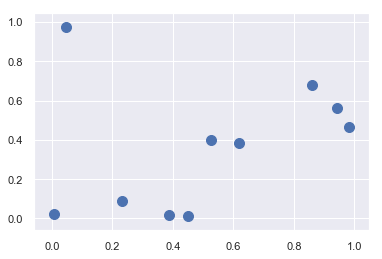

In [211]:
plt.scatter(X[:,0], X[:, 1], s=100);

이제 각 쌍의 점 사이의 거리를 계산할 것이다. 두 점 사이의 거리 제곱은 각 차원 간의 차이를 제곱해서 덯나 값과 같다는 사실을 기억하자. NumPy에서 제공하는 효율적인 브로드캐스팅 루틴을 사용해 코드 한 줄로 제곱 거리 행렬을 계산할 수 있다.

In [212]:
dist_sq = np.sum((X[:, np.newaxis,:] - X[np.newaxis,:,:]) ** 2, axis=-1)

이 연산에는 많은 것이 포함돼 있으며, NumPy의 브로드캐스팅 규칙이 익숙하지 않은 독자라면 다소 헷갈릴 수도 있다. 이런 코드를 만나면 코드를 구성 단계로 나누어 보는 것이 유용할 수 있다.

In [213]:
# 각 쌍의 점 사이의 좌표 차이를 계산함
differences = X[:, np.newaxis, :] - X[np.newaxis, :, :]
differences.shape

(10, 10, 2)

In [214]:
#좌표 차이를 제곱함
sq_differences = differences ** 2
sq_differences.shape

(10, 10, 2)

In [215]:
# 제곱 거리를 구하기 위해 좌표 차이를 더함
dist_sq = sq_differences.sum(-1)
dist_sq.shape

(10, 10)

작업한 내용을 확인하는 차원에서 이 행렬의 대각선이 모두 0인지 확인해야한다.

In [216]:
dist_sq.diagonal()

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

확인이 끝났다! 이 제곱 거리를 변환하면 이제 np.argsort를 이용해 행별로 정렬할 수 있다. 그러면 가장 왼쪽 열이 가장 가까운 이웃의 인덱스를 제공할 것이다.

In [217]:
nearest = np.argsort(dist_sq, axis=1)
print(nearest)

[[0 3 9 7 1 4 2 5 6 8]
 [1 4 7 9 3 6 8 5 0 2]
 [2 1 4 6 3 0 8 9 7 5]
 [3 9 7 0 1 4 5 8 6 2]
 [4 1 8 5 6 7 9 3 0 2]
 [5 8 6 4 1 7 9 3 2 0]
 [6 8 5 4 1 7 9 3 2 0]
 [7 9 3 1 4 0 5 8 6 2]
 [8 5 6 4 1 7 9 3 2 0]
 [9 7 3 0 1 4 5 8 6 2]]


첫 번째 열은 숫자 0부터 9까지 순서대로 나타나는 것을 알 수 있다. 이미 예상했겠지만 각 점의 가장 가까운 이웃은 자기 자신이기 때문이다.

여기서는 전체 정렬을 사용해 실제로 이 경우에 필요한 것보다 더 많은 일을 한 셈이다. 가장 가까운 k이웃을 구하기만 하면 된다면 각 행을 파티션으로 나눠 가장 작은 k+1개의 제곱 거리가 먼저 오고 그 보다 큰 거리의 요소를 배열의 나머지 위치에 채워지게만 하면 된다. 이 작업은 np.argpartition함수로 할 수 있다.

In [218]:
K = 2
nearest_partition = np.argpartition(dist_sq, K+1, axis=1)

이 이웃의 네트워크를 시각화하기 위해 각 점을 가장 가까운 두 개의 이웃과 연결한 선과 함께 플로팅 해보자

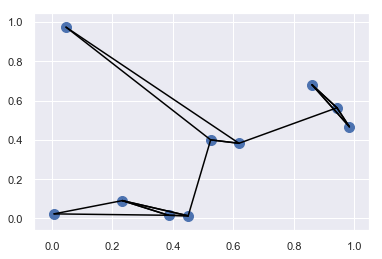

In [219]:
plt.scatter(X[:, 0], X[:, 1], s=100)
# 각 점을 두 개의 가장 가까운 이웃과 선으로 이름
K=2
for i in range(X.shape[0]):
    for j in nearest_partition[i, :K+1]:
        # X[i]부터 X[j]까지 선으로 이음
        # zip 매직 함수를 이용함
        plt.plot(*zip(X[j], X[i]), color='black')

도표의 각 점은 두 개의 가장 가까운 이웃과 선으로 연결돼 있다. 언뜻 보면 일부 점에서 두 개 이상의 선이 나와서 이상해 보일 수 있다. 그 이유는 점 A가 점 B의 가장 가까운 이웃 중 하나라는 사실이 반드시 점 B가 점 A의 가장 가까운 이웃 중 하나라는 것을 의미하지는 않기 때문이다.

이 방식에서 사용한 브로드캐스팅과 행 단위의 정렬이 루프를 작성하는 것보다 더 복잡해 보이지만, 파이썬에서는 그것이 이 데이터를 조작하는 매우 효율적인 방식이다. 같은 유형의 작업을 직접 데이터를 반복해 각 이웃의 집합을 정렬해서 하고 싶을 수도 있겠지만 그것이 위에서 보여준 벡터화 방식보다 더 느린 알고리즘을 만들어낼 것이 거의 확실하다. 이 방식의 장점은 입력 데이터의 크기에 구애받지 않는 방식으로 작성됐다는 점이다. 임의이 차원에서 100개들 100만개든 그사이의 이웃을 쉽게 계산할 수 있고 코드도 동일하다.

마지막으로 매우 많은 개수의 최근접 이웃을 검색하는 경우에는 복잡도가O[NlogN]인 트리 기반의 and/or 근사 알고리즘을 사용할 수 있는데, 이 알고리즘이 복잡도가 O[N^2]인 무차별 대입 알고리즘 보다 더 낫다. 이 알고리즘의 대표적인 예로 Scikit-Learn에 구현된 KD 트리를 들 수 있다.

#### 대문자 (빅-O) 표기법
대문자 O 표기법은 입력값의 크기가 커질수록 알고리즘에 필요한 연산의 수가 얼마나 늘어나는지를 나타내는 수단이다. 이 표기법을 올바르게 사용한다는 것은 컴퓨터과학 이론 영역을 깊이 이해하고 이 표기법과 그와 관련된 소문자 o 표기법, 대문자 세타($theta$)표기법, 대문자 오메가 표기법, 그 밖의 수많은 변형들과의 차이점을 구별해낼 수 있다는 뜻이다. 이 구분은 알고리즘 복잡도를 더 정확하게 기술하는 데 도움이 되지만, 컴퓨터과학 일노 시험과 현학적인 블로거들의 글 외에는 실제로 그것을 구분하는 사례는 드물다. 데이터 과학 세계에서는 대문자 O 표기법을 알고리즘의 복잡도에 의한 일반적인(부정확하더라도) 설명으로 덜 엄격하게 사용한느 것이 훨씬 일반적이다. 이론가나 현학자에게는 미안하지만 이 책에서는 이 표기법을 그러한 의미로 사용했다.

이렇게 느슨한 의미에서 대문자 O 표기법은 데이터의 양을 증가시킬 때 알고리즘을 수행하는 데 얼마나 많은 시간이 걸리는지를 알려준다. 길이 N=1000인 리스트를 연산하는데 1초가 걸리는 O[N]('N차'라고 읽음) 알고리즘을 가지고 있다면 길이 N=5000인 리스트를 처리하는 데는 대략 5초가 걸릴 것이라 예상할 수 있다. 길이 N=1000인 경우에 1초가 걸리는 O[$N^2$]['N 제곱 차' 라고 읽음) 알고리즘이 있다면 N=5000인 경우에는 약 25초가 걸릴 것으로 예상할 수 있다.

여기서 N은 대개 데이터의 크기9점의 수, 차원 수 등)를 나타낸다. 수십억 개나 수조 개의 표본을 분석한다면 O[N]과 O[$N^2$]의 차이는 엄청날 수 있다.

대문자 O 표기법 자체가 연산에 걸리는 실제 시간을 알려주지는 않으며, 단지 N이 바뀔때 어떻게 변하는지만 알려줄 뿐이라는 사실을 명심하라. 예를 들어, 일반적으로 O[N] 알고리즘이 O[$N^2$] 알고리즘보다 더 나은 확장성을 가진다고 볼 수 있고 그 말이 맞다. 그렇지만 특히 작은 데이터에서는 더 낭느 확장성을 가진 알고리즘이라도 더 빠르지 않을 수 있다. 예를 들어, 알고리즘으로 0.01초가 걸리는 문제가 '더 나은' O[$N^2$] 알고리즘보다 더 나은 확장성을 가진다고 볼 수 있고 그 말이 맞다. 그렇지만 특히 작은 데이터에서는 더 낭느 확장성을 가진 알고리즘이라도 더 빠르지 않을 수 있다. 예를 들어, 알고리즘으로 0.01초가 걸리는 문제가 '더 나은' O[$N^2$] 알고리즘으로는 1초가 걸릴 수도 있다. 그렇지만 N이 1000배로 증가하면 O[N] 알고리즘이 이길 것이다.

이 느슨한 의미의 대문자 O 표기법은 알고리즘 성능을 비교할 때 매우 유용하며, 이 책에서 알고리즘의 복잡도가 얼마나 증가할지에 대해 얘기할 때 이 표기법을 사용할 것이다.

#### 구조화된 데이터: NumPy의 구조화된 배열

대체로 데이터는 동종의 값의 배열로 잘 표현할 수 있지만 그렇지 않은 경우도 있다. 이 절에서는 NumPy에서 복합적인 이종 데이털르 효율적으로 저장하기 위한 구조화된 배열과 레코드 배열에 관해 설명하겠다. 여기서 보여주는 패턴이 간단한 연산에 유용하기는 하지만, 이같은 시나리오가 3장에서 살펴볼 Pandas DataFrame을 사용할 때도 도움이 된다.

여러 사람에 대한 다양한 종류의 데이터(이름, 나이, 몸무게라고 하자)가 있고 파이썬 프로그램에서 사용할 수 있도록 이 값을 저장하고 싶다고 해 보자. 먼저 세 개의 다른 배열에 저장할 수 있다.

In [220]:
name = ['Alice', 'Bob', 'Cathy', 'Doug']
age = [25, 45, 37, 19]
weight = [55.0, 85.5, 68.0, 61.5]

하지만 이 방식은 다소 어설프다. 이렇게 하면 이 세 배열이 서로 연관돼 있음을 알 수가 없다. 이 데이터를 모두 단일 구조에 저장할 수 있다면 더 자연스러울 것이다. NumPy는 복합 데이터 타입을 가지는 배열인 구조화된 배열을 통해 이러한 경우를 처리할 수 있다.

앞에서 다음과 같은 표현식을 이용해 생성한 간단한 배열을 떠올려 보자.

In [221]:
x = np.zeros(4, dtype=int)

 이와 유사하게 복합 데이터 타입을 지정함으로써 구조화된 배열을 만들 수 있다.

In [222]:
# 구조화된 배열을 윟 ㅐ복합 데이터 타입 사용
data = np.zeros(4, dtype={'names':('name', 'age', 'weight'), 'formats':('U10', 'i4', 'i8')})
print(data.dtype)

[('name', '<U10'), ('age', '<i4'), ('weight', '<i8')]


여기서 'U10'은 '최대 길이 10을 갖는 유니코드 문자열'이고 'i4'는 '4바이트(32비트) 정수', 'f8'은 '8바이트(64비트) 부동 소수점'을 의미한다. 이 타입 코드의 다른 옵션에 대해서는 다음 절에서 논의하겠다. 

빈 컨테이너 뱅려을 만들었으니 이제 이 배열에 값 리스트를 채우면 된다.

In [223]:
data['name']=name
data['age']=age
data['weight']=weight
print(data)

[('Alice', 25, 55) ('Bob', 45, 85) ('Cathy', 37, 68) ('Doug', 19, 61)]


바라던 대로 이제 데이터가 하나의 편리한 메모리 블록에 함께 정렬돼 있다.

구조화된 배열의 편리한 점 중 하나는 값을 인덱스나 이름으로 참조할 수 있다는 것이다.

In [224]:
#  전체 이름 가져오기
data['name']

array(['Alice', 'Bob', 'Cathy', 'Doug'], dtype='<U10')

In [225]:
# 데이터의 첫 번재 행 가져오기
data[0]

('Alice', 25, 55)

In [226]:
# 마지막 행의 이름 가져오기
data[-1]['name']

'Doug'

부울 마스킹을 이용하면 나이로 필터를 적용하는 것과 같이 좀 더 복잡한 연산도 할 수 있다.

In [227]:
# 나이가 30 이하인 이름 가져오기
data[data['age'] < 30]['name']

array(['Alice', 'Doug'], dtype='<U10')

이보다 더 복잡한 연산을 하고 싶다면 당므 장에서 다룰 Pandas 패키지를 사용하는 것이 좋다. 앞으로 보겠지만 Pandas는 지금까지 봤던 것과 유사한 NumPy 배열 기반의 다양한 데이터 가공 기능을 훨ㅆ니 더 많이 가지고 있는 DataFrame 객체를 제공한다.

#### 구조화된 배열 만들기
구조화된 배열 데이터 타입은 여러 가지 방식으로 지정할 수 있다. 앞에서는 딕셔너리 방식으로 지정했다.

In [228]:
np.dtype({'names':('name', 'age', 'weight'), 'formats':('U10', 'i4', 'f8')})

dtype([('name', '<U10'), ('age', '<i4'), ('weight', '<f8')])

숫자 타입은 파이썬 타입이나 NumPy dtype으로 지정할 수 있다.

In [229]:
np.dtype({'names':('name', 'age', 'weight'), 'formats':((np.str_, 10), int, np.float32)})

dtype([('name', '<U10'), ('age', '<i4'), ('weight', '<f4')])

복합 타입은 튜플의 리스트로 지정할 수도 있다.

In [230]:
np.dtype([('name', 'S10'), ('age', 'i4'), ('weight', 'f8')])

dtype([('name', 'S10'), ('age', '<i4'), ('weight', '<f8')])

타입의 이름이 중요하지 않다면 콤마로 구분된 문자열에 타입만 지정할 수도 있다.

In [231]:
np.dtype('S10, i4, f8')

dtype([('f0', 'S10'), ('f1', '<i4'), ('f2', '<f8')])

짧아진 문자열 포맷 코드가 다소 헷갈릴 수 있지만, 이 코드는 간단한 원칙을 바탕으로 작성도니 것이다. 첫 번재(선택적)문자는 < 또는 > 로, 각각 '리틀 엔디언'과 '빅 엔디언'을 의미하며 비트의 순서를 지정한다. 그 다음 문자는 문자, 바이트, 정수, 부동 소수점 등 데이터 타입을 짖어한다. 마지막 문자는 해당 객체의 크기를 바이트 단위로 나타낸다.

#### 고급 복합 타입
더 복잡한 복합 타입을 정의하는 것도 가능하다. 예를 들어, 각 요소가 값의 배열이나 행렬을 담고 있는 타입을 만들 수 있다. 여기서는 3x3 부동 소수점 행렬로 구성된 mat 컴포넌트를 가지는 데이터 타입을 만들 것이다.

In [232]:
tp = np.dtype([('id', 'i8'), ('mat', 'f8', (3, 3))])
X = np.zeros(1, dtype=tp)
print(X[0])
print(X['mat'][0])

(0, [[0., 0., 0.], [0., 0., 0.], [0., 0., 0.]])
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


이제 배열 X의 각 요소는 id와 3x3 행렬로 구성된다. 왜 간단한 다차원 배열이나 파이썬 딕셔너리 대신 이것을 사용할까? 그 이유는 NumPy dtype이 C 구조체(structure) 정의에 직접 매핑되어 적절하게 작성된 C 프로그램에서 배열 내용을 포함하는 버퍼에 직접 접근할 수 있기 때문이다. 구조화된 데이터를 조작한느 C나 포트란 라이브러리에 파이썬 인터페이스를 작성한다면 아마 구조화된 배열이 상당히 유용 할 것이다.
### TODO 개념파악

#### 레코드 배열: 트위스트를 가진 구조화된 배열
NumPy는 방금 설명한 구조화된 배열과 거의 동일하지만, 딕셔너리 키 대신 속성으로 필드에 접글할 수 있는 np.recarray 클래스도 제공한다. 앞에서는 다음과 같이 입력해서 나이에 접근했다.

In [233]:
data['age']

array([25, 45, 37, 19])

데이터를 레코드 배열로 보면 약간 더 적은 키 입력으로 나이 데이터에 접근할 수 있다.

In [234]:
data_rec = data.view(np.recarray)
data_rec.age

array([25, 45, 37, 19])

레코드 배열의 단점은 필드에 접근할 때 동일한 구문을 사용해도 부가적인 오버헤드가 발생한다는 것이다. 다음 코드에서 확인할 수 있다.

In [235]:
%timeit data['age']
%timeit data_rec['age']
%timeit data_rec.age

163 ns ± 3.06 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)
2.64 µs ± 24.6 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
3.37 µs ± 56.4 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


더 편리한 표기법이 추가 오버헤드를 감수할 가치가 있는지는 응용 프로그램에 따라 다르다.



#### Pandas로 넘어가며
이번 장의 마지막 절이 이 절에서 구조화된 배열과 레코드 배열에 대해 다룬 것은 그것이 다음에 다룰 패키지인 Pandas로 자연스럽게 넘어갈 수 있는 주제이기 대문이다. 이번 절에서 논의한 구조화된 배열은 특히 C나 포트란, 그 밖의 다른 언어의 바이너리 데이터 포맷에 매핑하기 위해 NumPy 배열을 사용하는 경우처럼 특정 상황에 사용하기 위해 알아두면 좋다. 구조화된 데이터를 일상적으로 사용하기에는 Pandas 패키지가 훨씬 더 나으며, 다음 장에서 이 패키지에 대해 자세히 설명하겠다.